In [5]:
import pandas as pd
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [6]:

# Set the base directory where all the monthly folders are
base_dir = 'data'

# Find all CSV files recursively that contain 'street' in their filename
street_files = glob.glob(os.path.join(base_dir, '**', '*street*.csv'), recursive=True)

# List to collect individual DataFrames
dfs = []

for file_path in street_files:
    # Read the CSV
    df = pd.read_csv(file_path)

    # Extract the police force name from the filename
    file_name = os.path.basename(file_path)

    # Collect
    dfs.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)


In [7]:
combined_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,b739717899965b1d7067b85f3908bf1ddf496cec3a2c0a...,2022-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,0.074759,51.543613,On or near Victoria Road,E01000012,Barking and Dagenham 015D,Violence and sexual offences,Status update unavailable,NaN
1,6254a929f8b0fc9a51e077e2f2bb234b0f0d8e4cf68fc5...,2022-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,0.074759,51.543613,On or near Victoria Road,E01000012,Barking and Dagenham 015D,Violence and sexual offences,Status update unavailable,NaN
2,NaN,2022-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509930,51.410873,On or near Ludlow Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
3,NaN,2022-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
4,3f9ff13f7fc56470d662ceb95fca20f385e96bfc0d8d76...,2022-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18047379,14f579a9b02a52d09ea5b24f8f716a92daadca5508fa5b...,2025-02,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Shoplifting,Under investigation,NaN
18047380,ac57a4f83ebe8ba3b451ea3aec0992dc1f8c4daebe52e8...,2025-02,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Shoplifting,Under investigation,NaN
18047381,20bb07a2963c5c646c2f2d3a9a27043bbd0a9baa4c530f...,2025-02,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Shoplifting,Under investigation,NaN
18047382,8e17c0c1d35e20862c50f73a3f90bde67d7c03888c4668...,2025-02,Wiltshire Police,Wiltshire Police,-1.662679,51.225342,On or near Talavera Way,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN


In [8]:

df= combined_df.copy()

In [9]:
# Shape and types
print(df.shape)
print(df.dtypes)

# Preview
print(df.head())

# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)

# Duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Unique counts
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


(18047384, 12)
Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object
                                            Crime ID    Month  \
0  b739717899965b1d7067b85f3908bf1ddf496cec3a2c0a...  2022-03   
1  6254a929f8b0fc9a51e077e2f2bb234b0f0d8e4cf68fc5...  2022-03   
2                                                NaN  2022-03   
3                                                NaN  2022-03   
4  3f9ff13f7fc56470d662ceb95fca20f385e96bfc0d8d76...  2022-03   

                      Reported by                    Falls within  Longitude  \
0  Avon and Somerset Constabulary  Avon and Somerset Constabulary   0.074759   
1  Avon and Somerset Con

In [10]:
# Drop duplicates
df = df.drop_duplicates()

# Check critical columns
critical_cols = ['Longitude', 'Latitude', 'Crime type']
print(df[critical_cols].isnull().mean())

# Optional: Drop rows missing essential location data
df = df.dropna(subset=['Longitude', 'Latitude', 'Crime type'])


Longitude     0.016759
Latitude      0.016759
Crime type    0.000000
dtype: float64


In [11]:
# Total amount of crimes over all
print(f"Total crimes: {len(df)}")


Total crimes: 16792508


Month
2022-03    492743
2022-04    480646
2022-05    516875
2022-06    499658
2022-07    518234
2022-08    516554
2022-09    478383
2022-10    500271
2022-11    472399
2022-12    426829
2023-01    459131
2023-02    450607
2023-03    490351
2023-04    473777
2023-05    496433
2023-06    503090
2023-07    495205
2023-08    470319
2023-09    466401
2023-10    469107
2023-11    441424
2023-12    425057
2024-01    430579
2024-02    418501
2024-03    451776
2024-04    448397
2024-05    484046
2024-06    473048
2024-07    491401
2024-08    478243
2024-09    450292
2024-10    471519
2024-11    442688
2024-12    417224
2025-01    403803
2025-02    387497
Name: count, dtype: int64


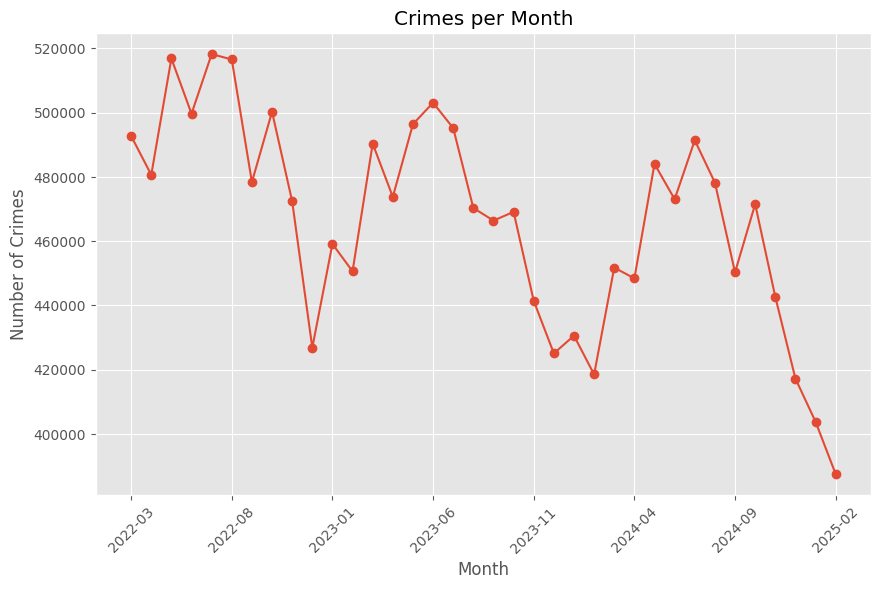

In [12]:
# Crimes per month

crimes_per_month = df['Month'].value_counts().sort_index()
print(crimes_per_month)

crimes_per_month.plot(marker='o', figsize=(10,6), title='Crimes per Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


Reported by
Metropolitan Police Service           2987315
West Midlands Police                  1065785
West Yorkshire Police                  944618
Thames Valley Police                   587633
Kent Police                            544845
Hampshire Constabulary                 525564
Northumbria Police                     511185
South Yorkshire Police                 502058
Essex Police                           494352
Merseyside Police                      486313
Lancashire Constabulary                481985
Avon and Somerset Constabulary         474698
Sussex Police                          423365
South Wales Police                     371756
Nottinghamshire Police                 350203
Devon & Cornwall Police                336895
Leicestershire Police                  314814
Derbyshire Constabulary                311326
West Mercia Police                     309843
Staffordshire Police                   302548
Humberside Police                      296247
Hertfordshire Constabu

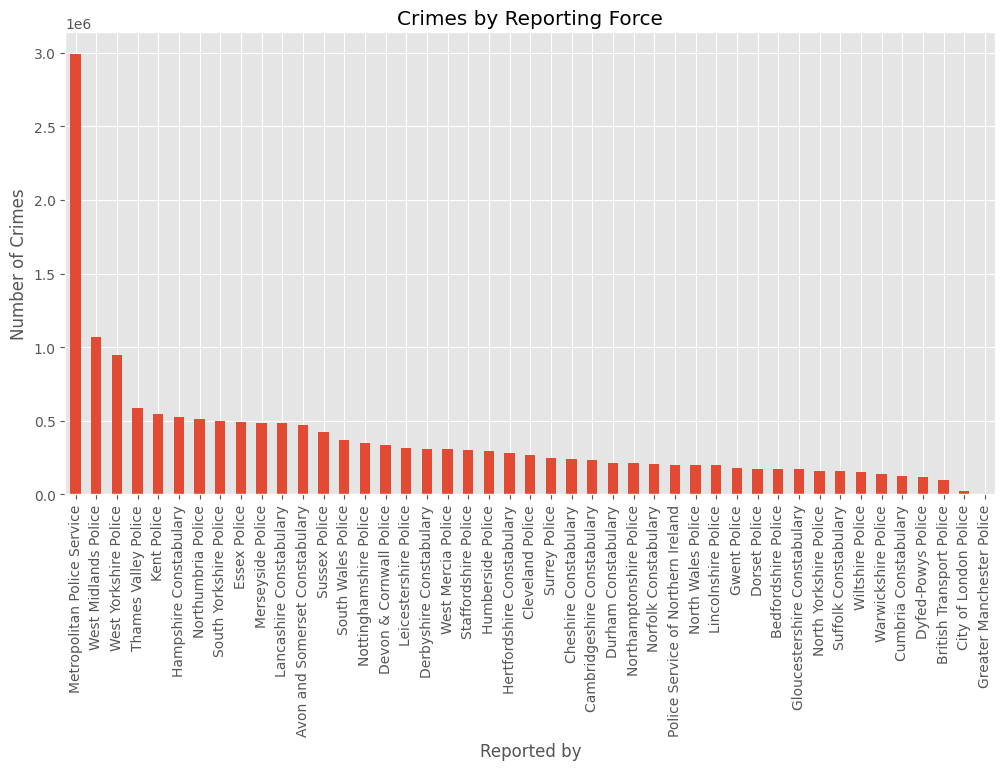

In [13]:
# Crimes by police force

crimes_by_force = df['Reported by'].value_counts()
print(crimes_by_force)

crimes_by_force.plot(kind='bar', figsize=(12,6), title='Crimes by Reporting Force')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()


Crime type
Violence and sexual offences    6096682
Anti-social behaviour           1933337
Criminal damage and arson       1373409
Public order                    1357401
Other theft                     1327213
Shoplifting                     1202693
Vehicle crime                   1058557
Burglary                         726053
Drugs                            492856
Theft from the person            340181
Other crime                      334575
Robbery                          210839
Bicycle theft                    185744
Possession of weapons            152968
Name: count, dtype: int64


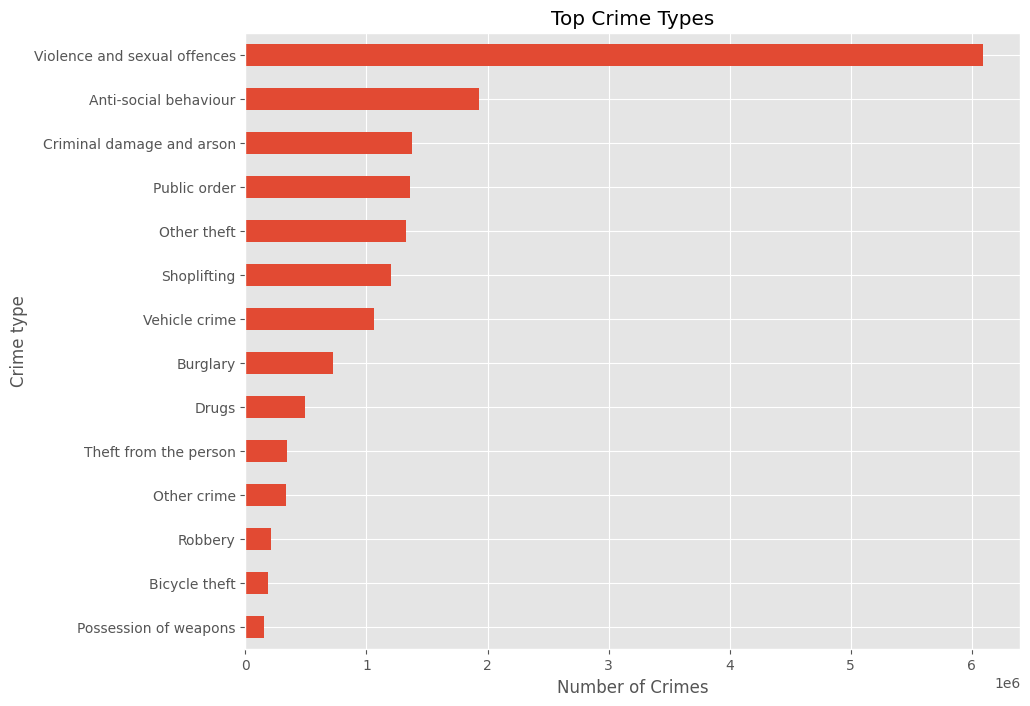

In [14]:
# Types of crimes

crime_types = df['Crime type'].value_counts()
print(crime_types)

# Plot
crime_types.plot(kind='barh', figsize=(10,8), title='Top Crime Types')
plt.xlabel('Number of Crimes')
plt.gca().invert_yaxis()
plt.show()


Location
On or near                                        676161
On or near Supermarket                            507410
On or near Parking Area                           497886
On or near Shopping Area                          315319
On or near Petrol Station                         255537
On or near Sports/Recreation Area                 134857
On or near Nightclub                              110636
On or near Hospital                                77743
On or near High Street                             71799
On or near Police Station                          59279
On or near Further/Higher Educational Building     57105
On or near Theatre/Concert Hall                    52068
On or near Park/Open Space                         45046
On or near Station Road                            32365
On or near Bus/Coach Station                       31121
On or near Church Street                           27755
On or near Conference/Exhibition Centre            17979
On or near Pedestrian 

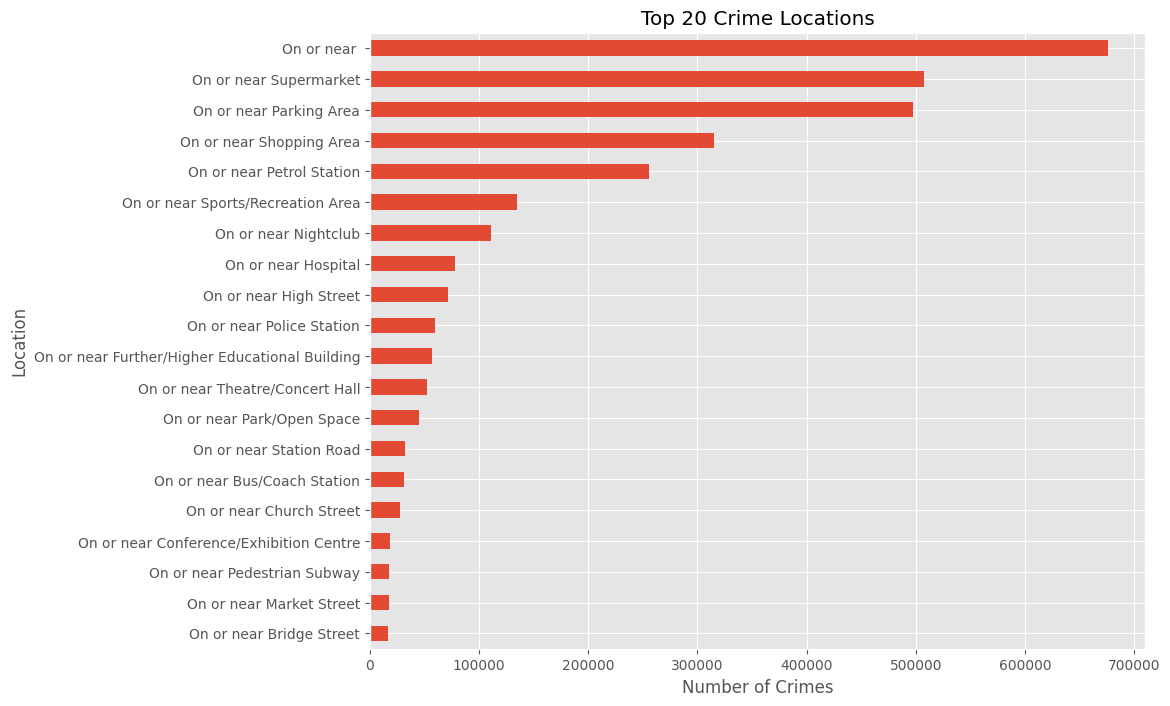

In [15]:
# Locations

top_locations = df['Location'].value_counts().head(20)
print(top_locations)

top_locations.plot(kind='barh', figsize=(10,8), title='Top 20 Crime Locations')
plt.xlabel('Number of Crimes')
plt.gca().invert_yaxis()
plt.show()


Last outcome category
Investigation complete; no suspect identified          6055313
Unable to prosecute suspect                            5141754
NaN                                                    2183334
Status update unavailable                              1012372
Court result unavailable                                712793
Under investigation                                     494546
Local resolution                                        378059
Awaiting court outcome                                  237653
Action to be taken by another organisation              191293
Offender given a caution                                119569
Further investigation is not in the public interest     112890
Formal action is not in the public interest              62958
Further action is not in the public interest             62370
Offender given penalty notice                            12807
Suspect charged as part of another case                   9608
Offender given a drugs possession

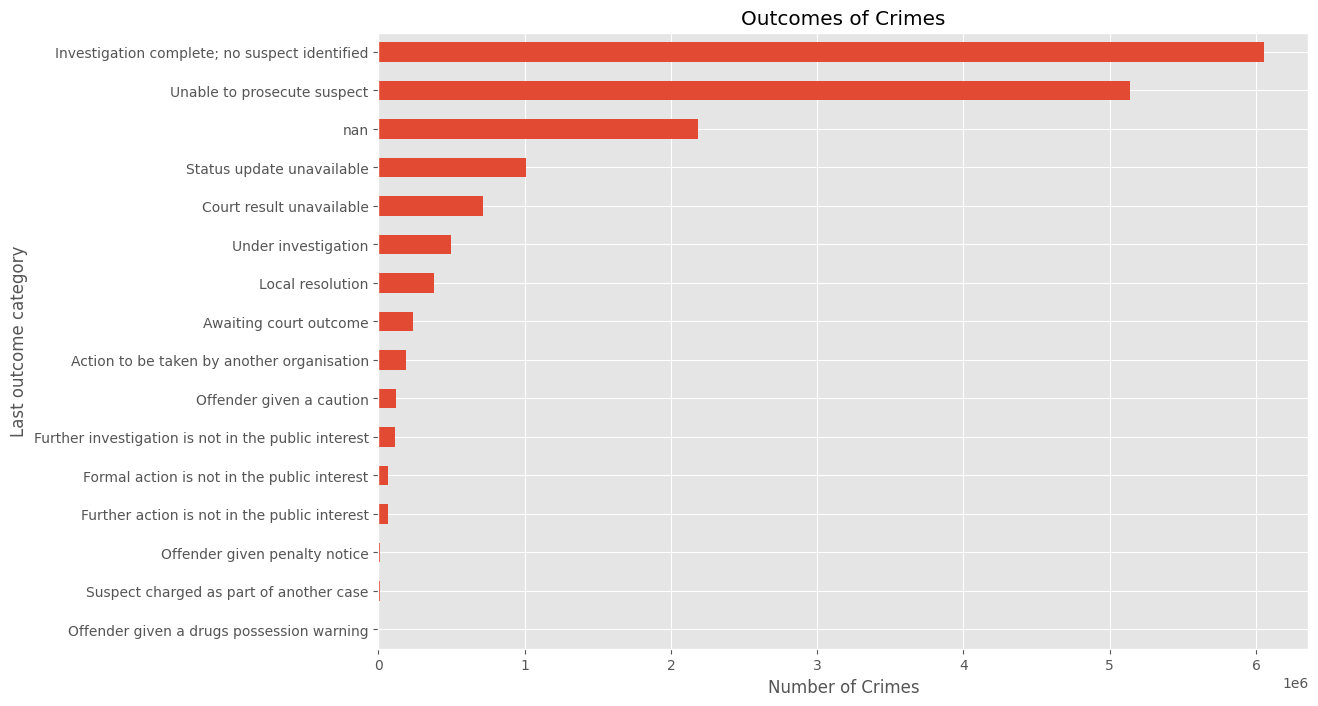

In [16]:
# Outcomes

outcomes = df['Last outcome category'].value_counts(dropna=False)
print(outcomes)

outcomes.plot(kind='barh', figsize=(12,8), title='Outcomes of Crimes')
plt.xlabel('Number of Crimes')
plt.gca().invert_yaxis()
plt.show()


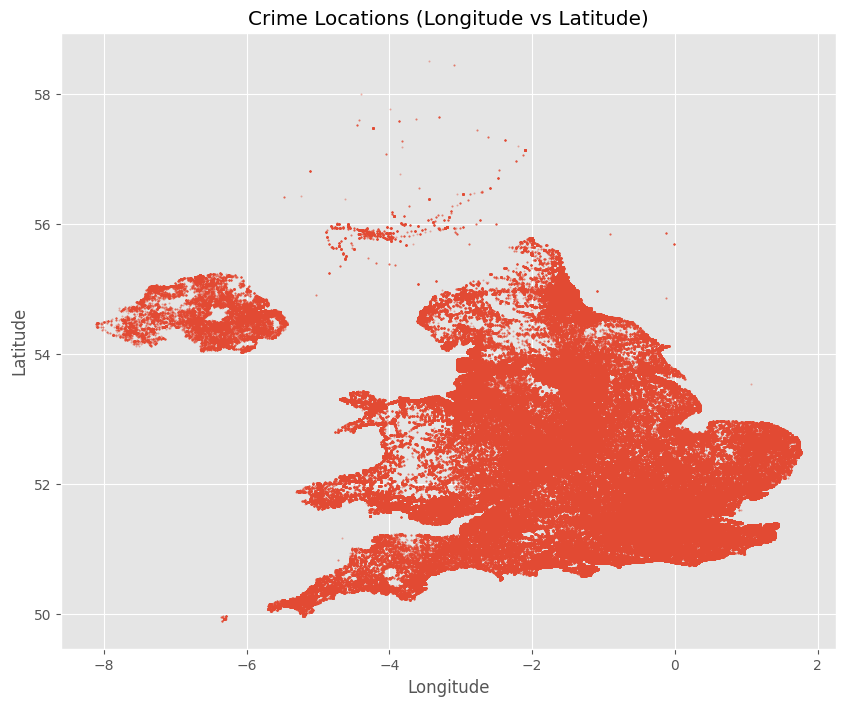

In [17]:
# Geospatial analysis

# Simple plot of longitude and latitude
plt.figure(figsize=(10,8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.3, s=1)
plt.title('Crime Locations (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


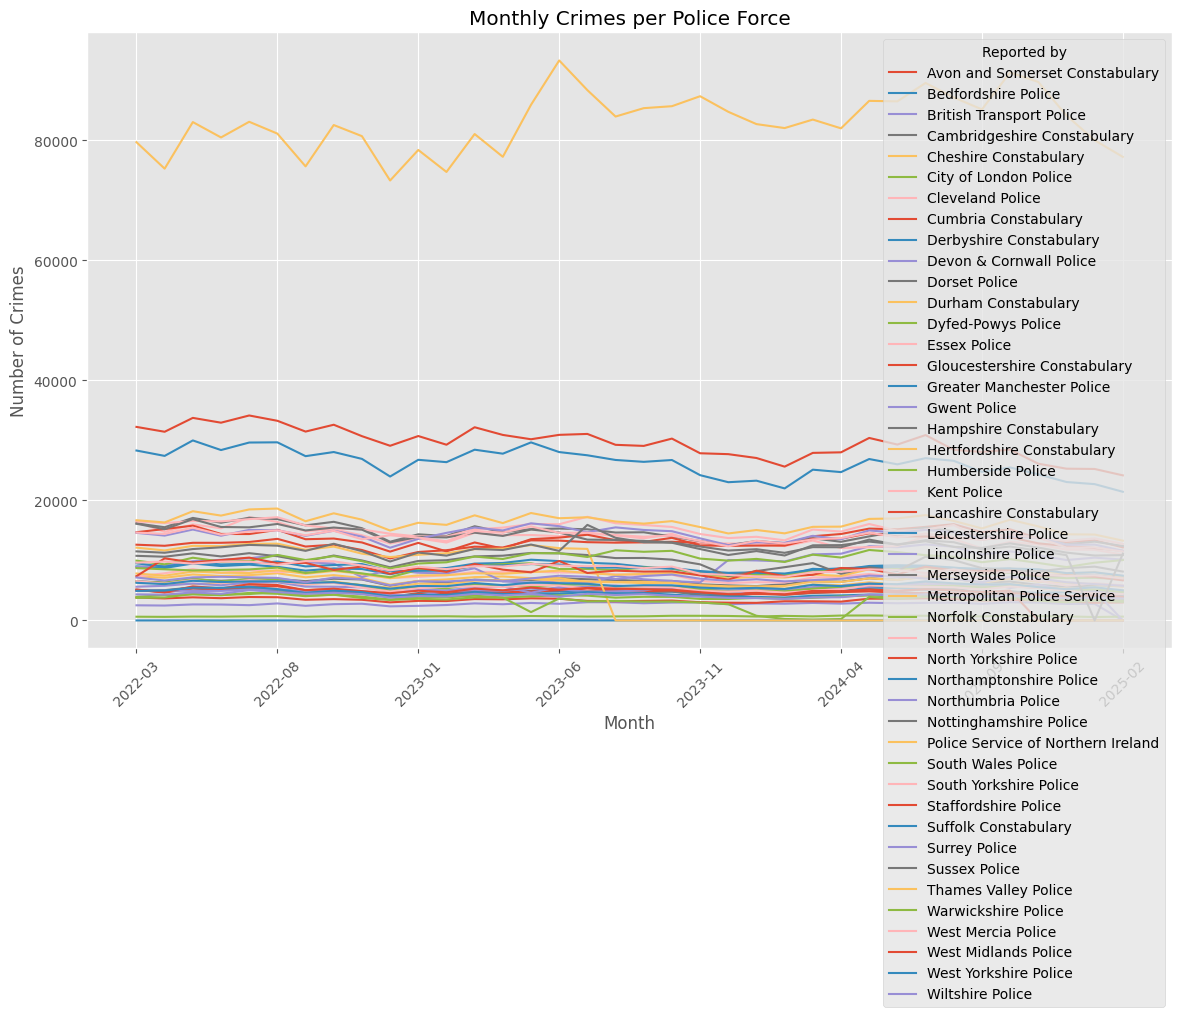

In [18]:
# Crimes over time per force

monthly_force = df.groupby(['Month', 'Reported by']).size().unstack(fill_value=0)
monthly_force.plot(figsize=(14,8), title='Monthly Crimes per Police Force')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


Last outcome category         Action to be taken by another organisation  \
Crime type                                                                 
Bicycle theft                                                        119   
Burglary                                                             345   
Criminal damage and arson                                           4564   
Drugs                                                               1262   
Other crime                                                        11556   
Other theft                                                         2704   
Possession of weapons                                               1090   
Public order                                                        8010   
Robbery                                                              200   
Shoplifting                                                         1002   
Theft from the person                                                286   
Vehicle crim

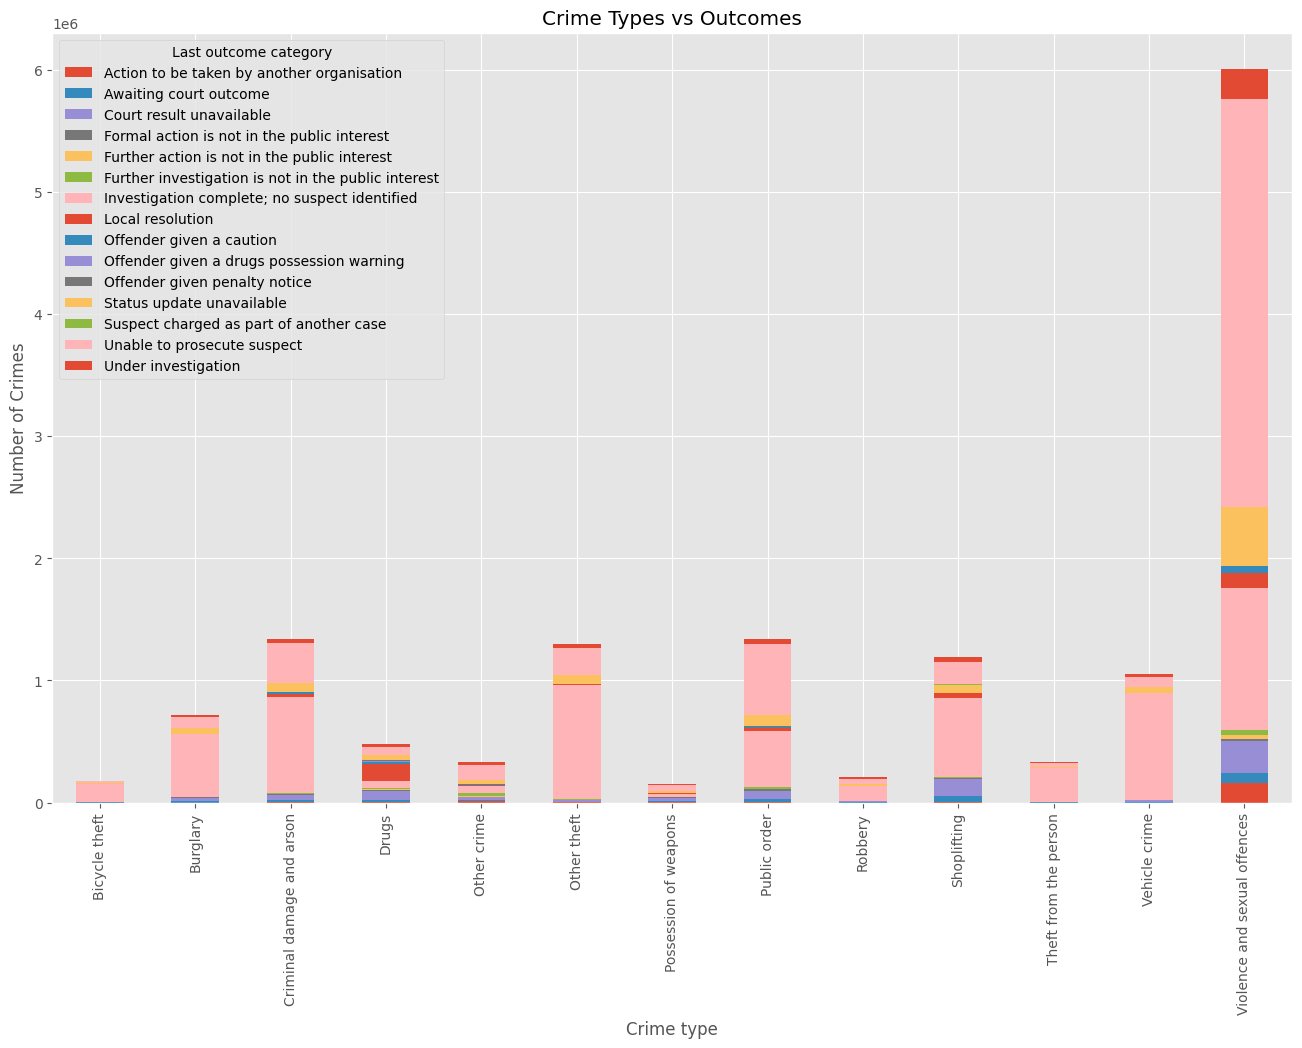

In [19]:
# Crimes by crime types and outcome

cross_tab = pd.crosstab(df['Crime type'], df['Last outcome category'])
print(cross_tab)

# Optional: plot
cross_tab.plot(kind='bar', stacked=True, figsize=(16,10))
plt.title('Crime Types vs Outcomes')
plt.ylabel('Number of Crimes')
plt.show()


In [20]:

# Make sure df is filtered to London area
# You already have only London forces ("City of London Police" and "Metropolitan Police Service"), so good!

# Create a base map centered over London
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=11, tiles='cartodb positron')

# Create a marker cluster (so many points don't clutter the map)
marker_cluster = MarkerCluster().add_to(london_map)

# Sample if there are too many points (optional, speeds up rendering)
sample_df = df.sample(5000) if len(df) > 5000 else df

# Plot each crime as a point
for idx, row in sample_df.iterrows():
    location = [row['Latitude'], row['Longitude']]
    popup_info = (f"Crime Type: {row['Crime type']}<br>"
                  f"Location: {row['Location']}<br>"
                  f"Outcome: {row['Last outcome category']}")
    
    folium.Marker(
        location=location,
        popup=popup_info,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Save the map as an HTML file
london_map.save('london_crime_map.html')


In [21]:
# Filter for burglary crimes
burglary_df = df[df['Crime type'].str.lower() == 'burglary'].copy()

print(f"Total number of burglary crimes: {len(burglary_df)}")
burglary_df.head()


Total number of burglary crimes: 726053


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
14,e9231fd051bee63f32b0f85d0fd3392f4ce79d2190ddd3...,2022-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498613,51.416002,On or near High Street,E01014400,Bath and North East Somerset 001B,Burglary,Unable to prosecute suspect,NaN
61,9c5e50ec8a25c6b9fbf17a10b50ab46aa6d5ba85fe632f...,2022-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.501356,51.409139,On or near Park Road,E01014403,Bath and North East Somerset 002B,Burglary,Status update unavailable,NaN
78,e0abe614decaaac78f29ef21311756aba04378f27159e6...,2022-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491639,51.402661,On or near Sunnymead,E01014395,Bath and North East Somerset 003A,Burglary,Status update unavailable,NaN
89,052a10e8151e791f3fbe69b67ebe8ff6f5f458629ef915...,2022-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.487870,51.407820,On or near Lambourn Road,E01014398,Bath and North East Somerset 003D,Burglary,Status update unavailable,NaN
101,caaf99afa6ac4f9f9f7260c462b28a4b60554ebf3920a4...,2022-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.344335,51.401101,On or near Linen Walk,E01014409,Bath and North East Somerset 004A,Burglary,Status update unavailable,NaN


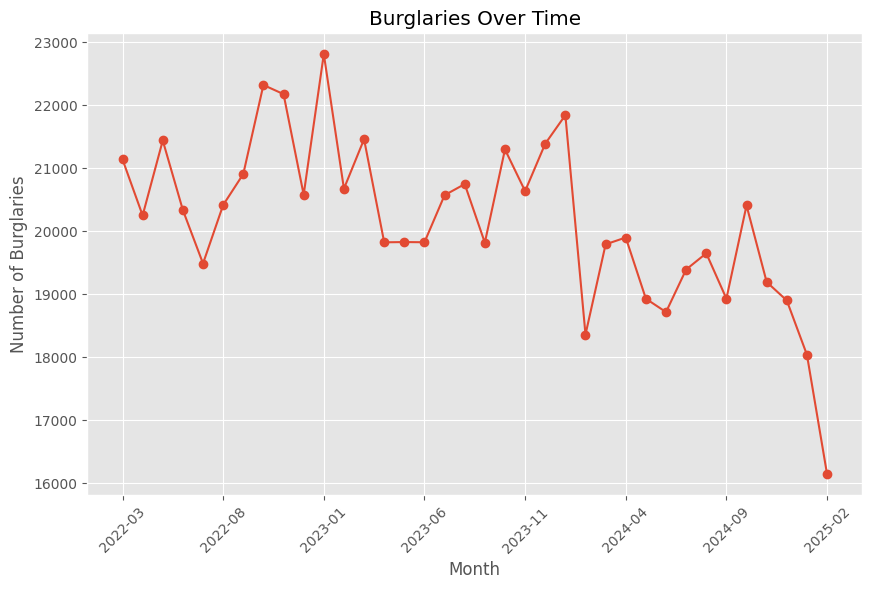

In [22]:
# Burglaries per month
burglary_per_month = burglary_df['Month'].value_counts().sort_index()

# Plot
burglary_per_month.plot(marker='o', figsize=(10,6), title='Burglaries Over Time')
plt.ylabel('Number of Burglaries')
plt.xticks(rotation=45)
plt.show()


Location
On or near                                        18203
On or near Parking Area                           16686
On or near Supermarket                            11086
On or near Shopping Area                           7681
On or near Petrol Station                          6316
On or near Sports/Recreation Area                  5729
On or near High Street                             2562
On or near Park/Open Space                         2501
On or near Nightclub                               2185
On or near Further/Higher Educational Building     2155
On or near Theatre/Concert Hall                    1725
On or near Station Road                            1569
On or near Hospital                                1370
On or near Church Street                           1201
On or near Church Lane                              988
On or near Church Road                              855
On or near Conference/Exhibition Centre             752
On or near Bus/Coach Station           

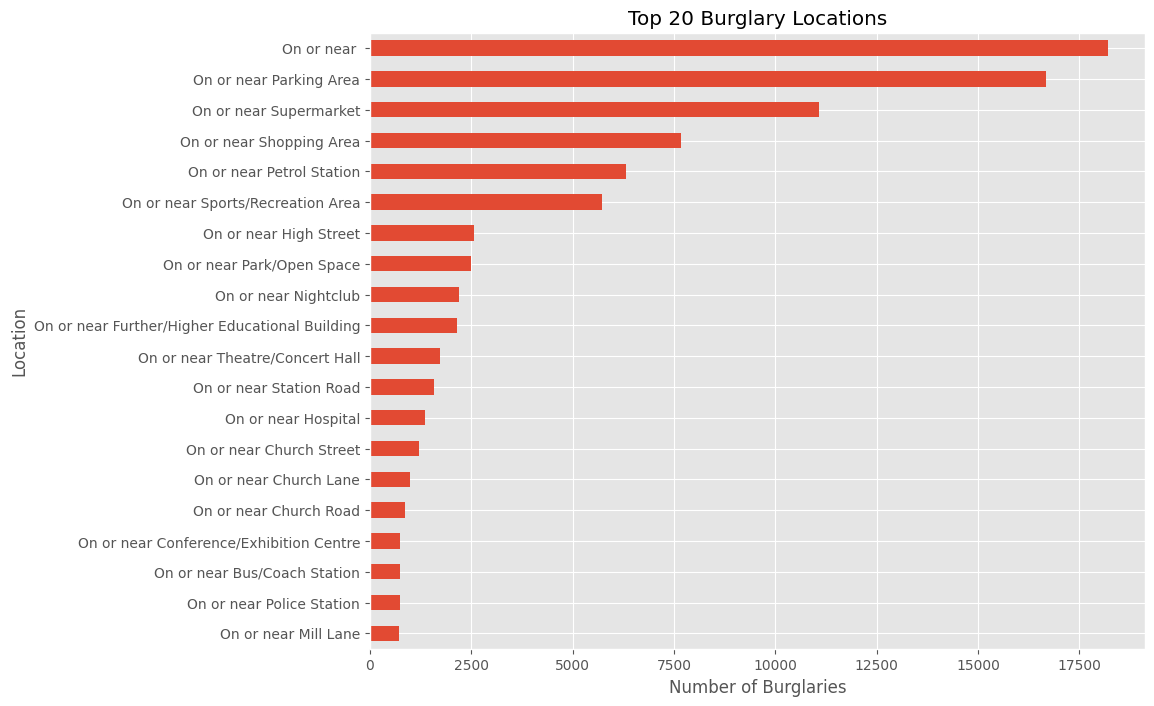

In [23]:
# Top 20 locations
top_burglary_locations = burglary_df['Location'].value_counts().head(20)
print(top_burglary_locations)

# Plot
top_burglary_locations.plot(kind='barh', figsize=(10,8), title='Top 20 Burglary Locations')
plt.xlabel('Number of Burglaries')
plt.gca().invert_yaxis()
plt.show()


Last outcome category
Investigation complete; no suspect identified          517470
Unable to prosecute suspect                             87202
Status update unavailable                               43117
Court result unavailable                                31334
Under investigation                                     23503
Awaiting court outcome                                   9707
NaN                                                      5769
Local resolution                                         2237
Suspect charged as part of another case                  2009
Offender given a caution                                 1311
Formal action is not in the public interest               850
Further investigation is not in the public interest       662
Further action is not in the public interest              531
Action to be taken by another organisation                345
Offender given penalty notice                               5
Offender given a drugs possession warning       

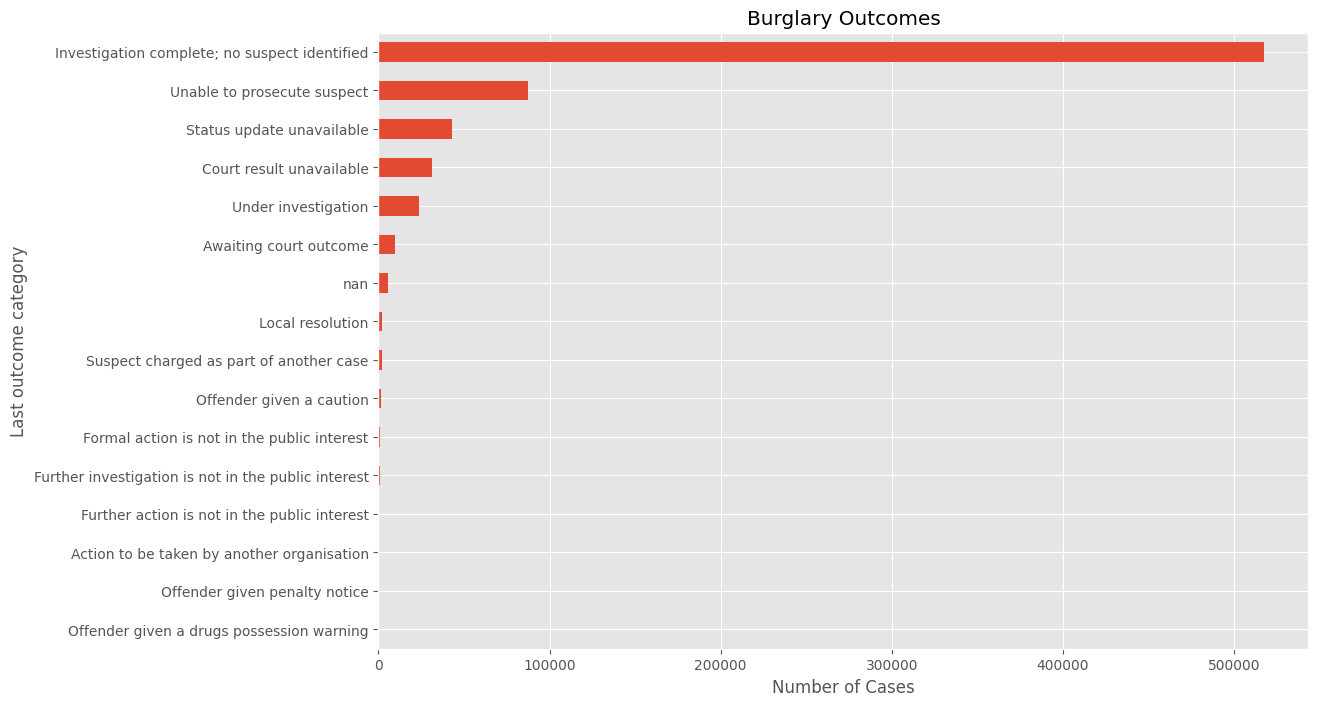

In [24]:
burglary_outcomes = burglary_df['Last outcome category'].value_counts(dropna=False)

# Display
print(burglary_outcomes)

# Plot
burglary_outcomes.plot(kind='barh', figsize=(12,8), title='Burglary Outcomes')
plt.xlabel('Number of Cases')
plt.gca().invert_yaxis()
plt.show()


In [25]:

# Create a base map centered on London
burglary_map = folium.Map(location=[51.509865, -0.118092], zoom_start=11, tiles='cartodb positron')

# Marker cluster
marker_cluster = MarkerCluster().add_to(burglary_map)

# Sample if dataset is too large
sample_burglary = burglary_df.sample(3000) if len(burglary_df) > 3000 else burglary_df

# Add points
for idx, row in sample_burglary.iterrows():
    location = [row['Latitude'], row['Longitude']]
    popup_info = (f"Location: {row['Location']}<br>"
                  f"Outcome: {row['Last outcome category']}")
    
    folium.Marker(
        location=location,
        popup=popup_info,
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(marker_cluster)

# Save
burglary_map.save('london_burglary_map.html')

# Optional: Open automatically
import webbrowser
webbrowser.open('london_burglary_map.html')


True

### Muhammad's attempt to find the LSOA's with the burglaries in London

Number of unique LSOAs in City of London: 6
LSOA codes in City of London: ['E01000005' 'E01032739' 'E01032740' 'E01000001' 'E01000003' 'E01000002']

Total number of burglaries in City of London: 1039

Burglary count by LSOA:


,LSOA name,burglary_count
4,City of London 001F,626
5,City of London 001G,208
3,City of London 001E,116
1,City of London 001B,34
2,City of London 001C,32
0,City of London 001A,23



Time-related columns available in the data: ['Month']

Burglaries by month:


,Month,count
2,2022-05,40
15,2023-06,40
17,2023-08,39
35,2025-02,37
9,2022-12,36
31,2024-10,35
13,2023-04,34
22,2024-01,34
5,2022-08,33
8,2022-11,33


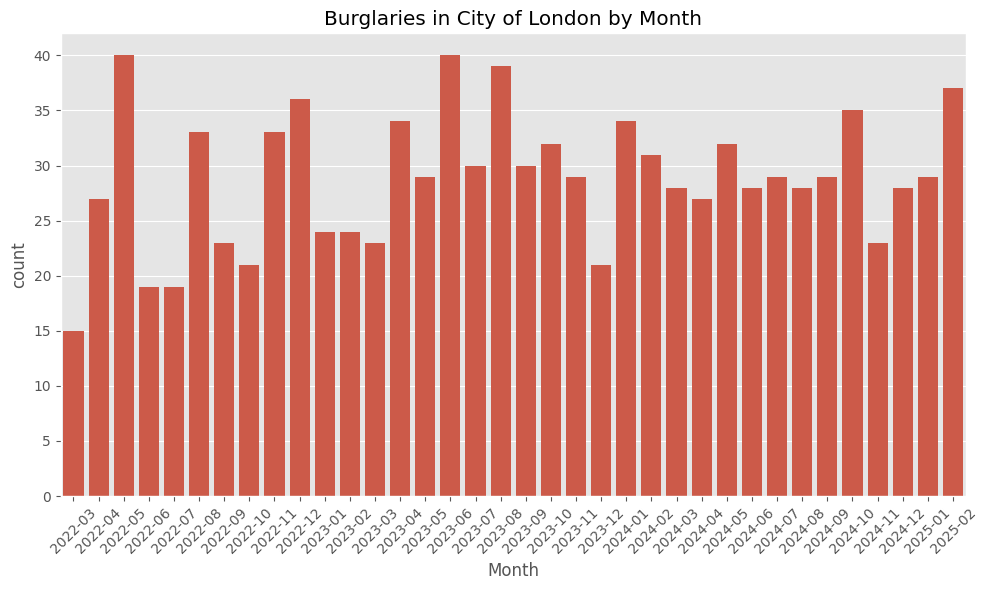

In [26]:
# Count LSOAs in City of London - notice the correct column name with proper capitalization and spacing
city_london_lsoas = burglary_df[burglary_df['LSOA name'].str.contains('City of London', na=False)]
print(f"Number of unique LSOAs in City of London: {city_london_lsoas['LSOA code'].nunique()}")
print(f"LSOA codes in City of London: {city_london_lsoas['LSOA code'].unique()}")

# Filter for burglaries in City of London
city_london_burglaries = city_london_lsoas[city_london_lsoas['Crime type'] == 'Burglary']
print(f"\nTotal number of burglaries in City of London: {len(city_london_burglaries)}")

# Group by LSOA to see burglary distribution across areas
burglary_by_lsoa = city_london_burglaries.groupby('LSOA name').size().reset_index(name='burglary_count')
print("\nBurglary count by LSOA:")
display(burglary_by_lsoa.sort_values('burglary_count', ascending=False))

# Check if Month column exists to analyze time patterns
print(f"\nTime-related columns available in the data: {['Month'] if 'Month' in city_london_burglaries.columns else []}")

# Analyze burglaries by month
if 'Month' in city_london_burglaries.columns:
    print("\nBurglaries by month:")
    burglary_by_month = city_london_burglaries.groupby('Month').size().reset_index(name='count')
    display(burglary_by_month.sort_values('count', ascending=False))
    
    # Visualize monthly pattern
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Month', y='count', data=burglary_by_month)
    plt.title('Burglaries in City of London by Month')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [27]:
from folium.plugins import MarkerCluster, HeatMap


Total stop and search records: 210

Sample of the data:


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2022-03-01T05:02:30+00:00,NaN,NaN,51.510014,-0.081516,Male,25-34,Black/African/Caribbean/Black British - Caribbean,Black,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Arrest,True,False
1,Person search,2022-03-01T06:43:58+00:00,NaN,NaN,51.512652,-0.092719,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
2,Person search,2022-03-02T02:54:11+00:00,NaN,NaN,51.517058,-0.083296,Male,25-34,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Khat or Cannabis warning,True,False
3,Person search,2022-03-02T05:53:53+00:00,NaN,NaN,51.512678,-0.079444,Male,18-24,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
4,Person search,2022-03-02T09:26:51+00:00,NaN,NaN,NaN,NaN,Male,NaN,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False



Number of successful searches (where items found): 30
Success rate: 14.29%

Outcomes of stop and searches:


Outcome
A no further action disposal       161
Arrest                              28
Khat or Cannabis warning            16
Penalty Notice for Disorder          2
Community resolution                 1
Summons / charged by post            1
Caution (simple or conditional)      1
Name: count, dtype: int64

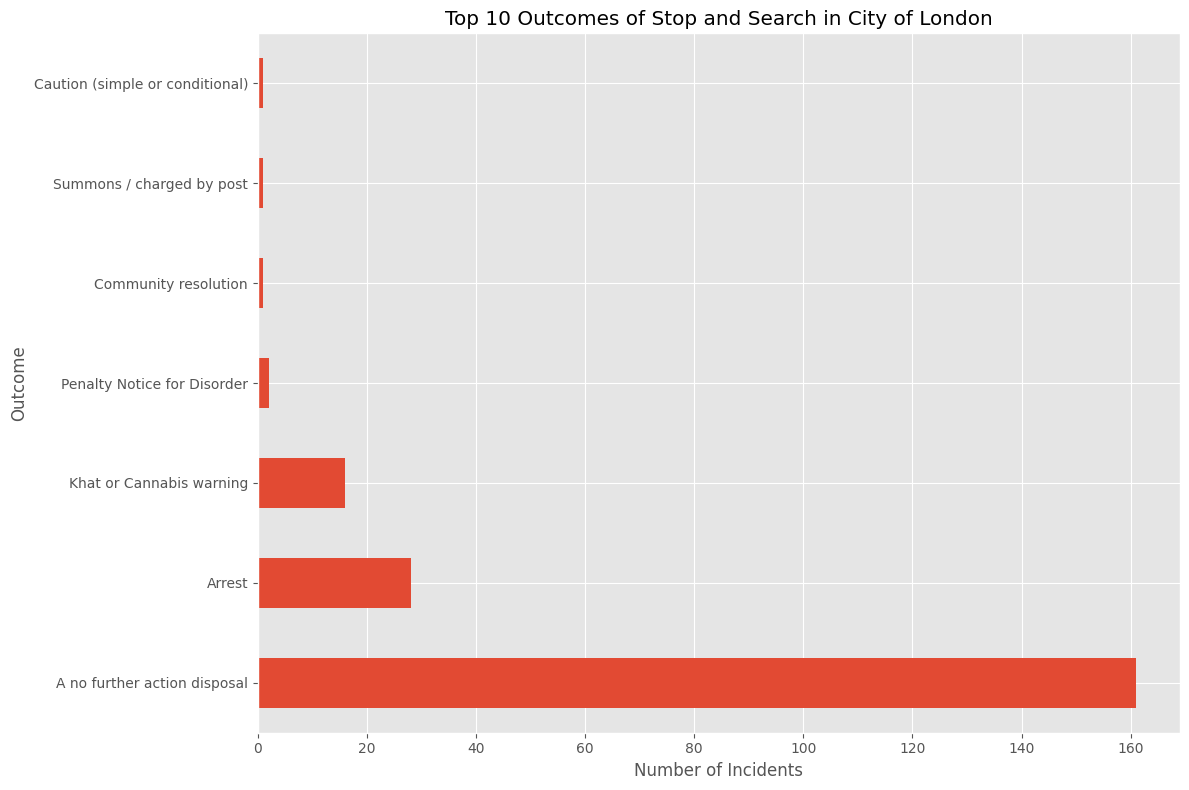


Records with geographic coordinates: 165 (78.57%)


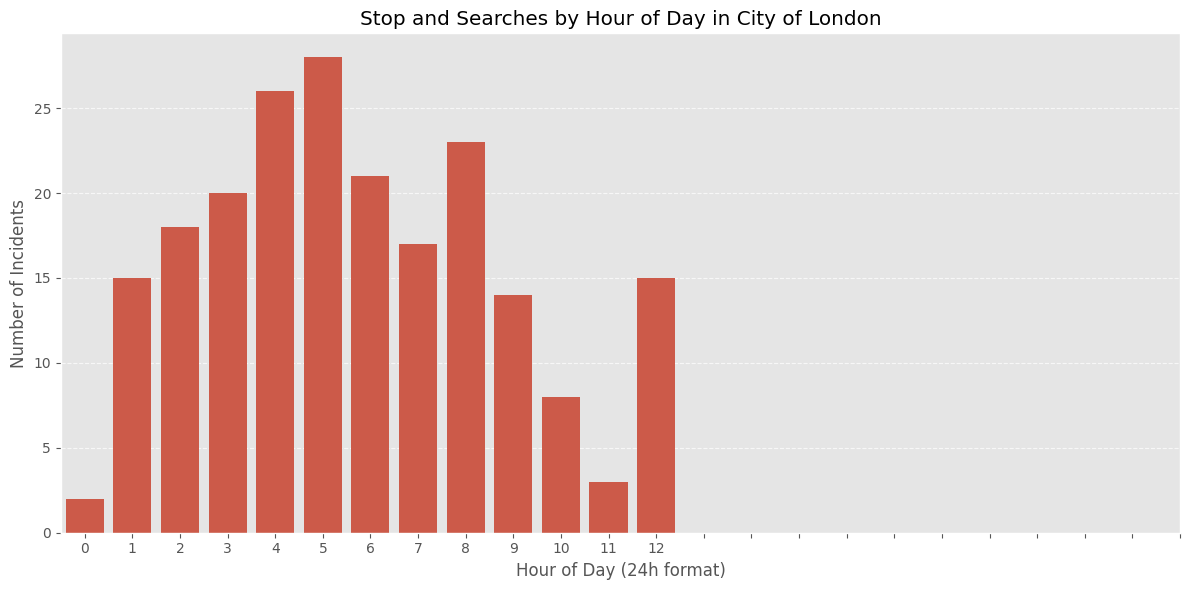

C:\Users\x1 yoga\AppData\Local\Temp\ipykernel_11288\1579503191.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_searches['DateTime'] = pd.to_datetime(successful_searches['Date'])
C:\Users\x1 yoga\AppData\Local\Temp\ipykernel_11288\1579503191.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_searches['Hour'] = successful_searches['DateTime'].dt.hour


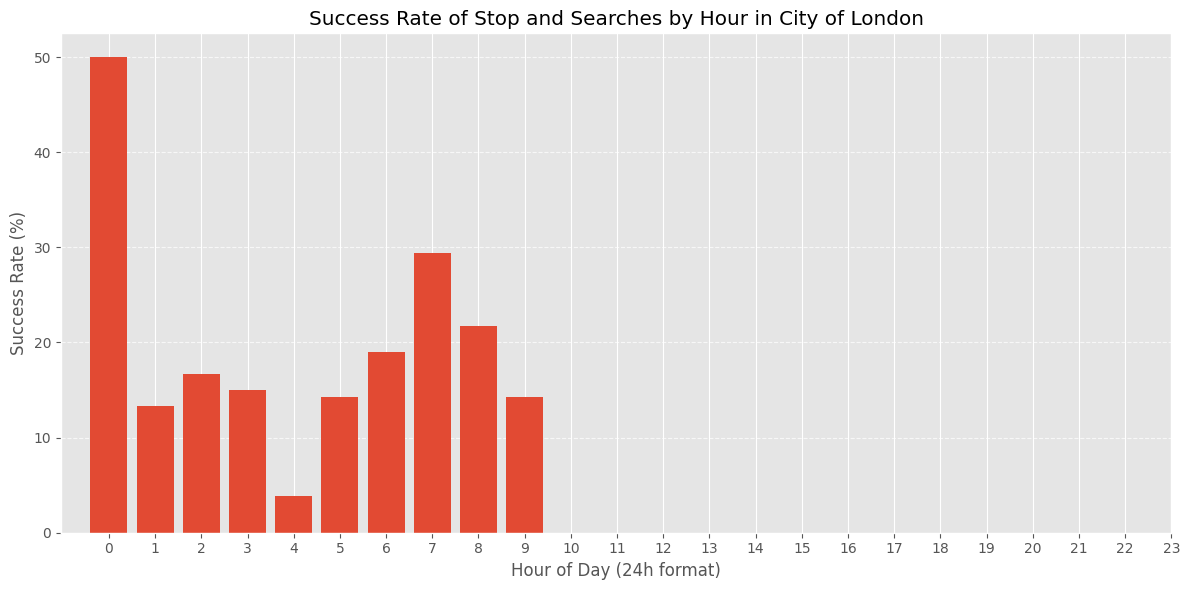


To relate stop and search data to specific LSOAs, we need to use the coordinates
and perform a spatial join with LSOA boundary data. This would require additional GIS libraries.
However, we can check if there's a correlation between stop and search locations and crime locations.

Crime types in the street crime data:


Crime type
Theft from the person           157
Other theft                     129
Violence and sexual offences     93
Anti-social behaviour            60
Shoplifting                      55
Drugs                            52
Public order                     37
Vehicle crime                    22
Bicycle theft                    22
Burglary                         22
Criminal damage and arson        21
Other crime                       7
Possession of weapons             6
Robbery                           5
Name: count, dtype: int64


Number of burglaries in the street crime data: 22

Error loading or analyzing crime data: 'float' object has no attribute 'split'


In [28]:
stop_search_df = pd.read_csv('data/2025-02/2022-03/2022-03-city-of-london-stop-and-search.csv')

# Display basic info about the dataset
print(f"Total stop and search records: {len(stop_search_df)}")
print("\nSample of the data:")
display(stop_search_df.head())

# Filter for successful searches (where something was found)
successful_searches = stop_search_df[stop_search_df['Outcome'].str.contains('Arrest|Caution|Community resolution|Drugs|Stolen goods', na=False)]
print(f"\nNumber of successful searches (where items found): {len(successful_searches)}")
print(f"Success rate: {len(successful_searches) / len(stop_search_df) * 100:.2f}%")

# Analyze outcomes
print("\nOutcomes of stop and searches:")
outcome_counts = stop_search_df['Outcome'].value_counts()
display(outcome_counts)

# Plot outcomes
plt.figure(figsize=(12, 8))
outcome_counts.head(10).plot(kind='barh')
plt.title('Top 10 Outcomes of Stop and Search in City of London')
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

# Check if we have geographic data
has_coords = (~stop_search_df['Latitude'].isna() & ~stop_search_df['Longitude'].isna()).sum()
print(f"\nRecords with geographic coordinates: {has_coords} ({has_coords/len(stop_search_df)*100:.2f}%)")

# Create a map to visualize the stop and search locations
if has_coords > 0:
    # Create a base map centered on London
    london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=13, tiles='CartoDB positron')
    
    # Add a heatmap layer for all stop and searches
    heat_data = [[row['Latitude'], row['Longitude']] for _, row in stop_search_df.dropna(subset=['Latitude', 'Longitude']).iterrows()]
    HeatMap(heat_data, radius=15).add_to(london_map)
    
    # Add markers for successful searches
    marker_cluster = MarkerCluster().add_to(london_map)
    
    for _, row in successful_searches.dropna(subset=['Latitude', 'Longitude']).iterrows():
        popup_text = f"""
        Date: {row['Date']}<br>
        Object of search: {row['Object of search']}<br>
        Outcome: {row['Outcome']}<br>
        """
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=folium.Popup(popup_text, max_width=300),
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(marker_cluster)
    
    # Save the map
    london_map.save('city_london_stop_search_map.html')
    
    # Try to display the map directly in the notebook
    display(london_map)
    
    # Analyze time patterns (extract hour from Date)
    # Convert Date to datetime
    stop_search_df['DateTime'] = pd.to_datetime(stop_search_df['Date'])
    stop_search_df['Hour'] = stop_search_df['DateTime'].dt.hour
    
    # Plot stop and searches by hour of day
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Hour', data=stop_search_df)
    plt.title('Stop and Searches by Hour of Day in City of London')
    plt.xlabel('Hour of Day (24h format)')
    plt.ylabel('Number of Incidents')
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Compare successful vs. unsuccessful searches by hour
    successful_searches['DateTime'] = pd.to_datetime(successful_searches['Date'])
    successful_searches['Hour'] = successful_searches['DateTime'].dt.hour
    
    plt.figure(figsize=(12, 6))
    # Calculate hourly success rates
    hourly_total = stop_search_df['Hour'].value_counts().sort_index()
    hourly_success = successful_searches['Hour'].value_counts().sort_index()
    hourly_success_rate = (hourly_success / hourly_total * 100).fillna(0)
    
    plt.bar(hourly_success_rate.index, hourly_success_rate.values)
    plt.title('Success Rate of Stop and Searches by Hour in City of London')
    plt.xlabel('Hour of Day (24h format)')
    plt.ylabel('Success Rate (%)')
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
# Try to relate stop and search to LSOAs
# We need to do a geospatial join since the stop and search data doesn't have LSOA codes directly
print("\nTo relate stop and search data to specific LSOAs, we need to use the coordinates")
print("and perform a spatial join with LSOA boundary data. This would require additional GIS libraries.")
print("However, we can check if there's a correlation between stop and search locations and crime locations.")

# Check if we have street-level crime data available
try:
    # Load street crime data for City of London from the previous analysis
    street_crime_df = pd.read_csv('data/2025-02/2022-06/2022-06-city-of-london-street.csv')
    
    # Display summary of crime types
    print("\nCrime types in the street crime data:")
    display(street_crime_df['Crime type'].value_counts())
    
    # Check if we have burglary data
    burglaries = street_crime_df[street_crime_df['Crime type'] == 'Burglary']
    print(f"\nNumber of burglaries in the street crime data: {len(burglaries)}")
    
    # If we have coordinates for both datasets
    if has_coords > 0 and (~burglaries['Latitude'].isna() & ~burglaries['Longitude'].isna()).sum() > 0:
        # Create a map showing both stop and searches and burglaries
        combined_map = folium.Map(location=[51.5074, -0.1278], zoom_start=13, tiles='CartoDB positron')
        
        # Add a heatmap layer for stop and searches
        folium.TileLayer('CartoDB dark_matter', name='Dark Map').add_to(combined_map)
        
        # Stop and search heatmap
        heat_data_ss = [[row['Latitude'], row['Longitude']] for _, row in stop_search_df.dropna(subset=['Latitude', 'Longitude']).iterrows()]
        search_heat = HeatMap(heat_data_ss, radius=15, gradient={0.4: 'blue', 0.6: 'cyan', 0.8: 'lime', 1.0: 'yellow'}, name='Stop & Search Heatmap')
        search_heat.add_to(combined_map)
        
        # Burglary heatmap
        heat_data_burg = [[row['Latitude'], row['Longitude']] for _, row in burglaries.dropna(subset=['Latitude', 'Longitude']).iterrows()]
        burglary_heat = HeatMap(heat_data_burg, radius=15, gradient={0.4: 'purple', 0.6: 'magenta', 0.8: 'red', 1.0: 'orange'}, name='Burglary Heatmap')
        burglary_heat.add_to(combined_map)
        
        # Add layer control
        folium.LayerControl().add_to(combined_map)
        
        # Save the map
        combined_map.save('city_london_search_burglary_map.html')
        
        # Try to display the map directly in the notebook
        display(combined_map)
        
        # Check for temporal patterns
        if 'Month' in burglaries.columns:
            print("\nBurglaries by month:")
            display(burglaries['Month'].value_counts())
            
        # Calculate average distance between stop & searches and nearest burglary
        print("\nThis analysis would require more sophisticated spatial analysis to calculate")
        print("the precise relationship between stop & search locations and burglary locations.")
    else:
        print("\nEither burglary or stop and search data is missing geographic coordinates.")
except Exception as e:
    print(f"\nError loading or analyzing crime data: {e}")

In [29]:
import glob
import os
from datetime import datetime
import matplotlib.pyplot as plt


In [30]:
# Set up a larger figure size for all plots
plt.rcParams['figure.figsize'] = [12, 8]
plt.style.use('ggplot')

# Find all City of London stop and search files
stop_search_files = glob.glob('data/2025-02/**/????-??-city-of-london-stop-and-search.csv', recursive=True)
print(f"Found {len(stop_search_files)} stop and search files for City of London")

# Load all files into a single dataframe
all_stop_search_df = pd.DataFrame()
file_counts = {}

for file in stop_search_files:
    # Extract the month/year from the filename
    basename = os.path.basename(file)
    month_year = basename.split('-city-of-london')[0]
    
    # Load the data
    try:
        df = pd.read_csv(file)
        df['file_date'] = month_year  # Add a column to track which file it came from
        file_counts[month_year] = len(df)
        
        # Append to the master dataframe
        all_stop_search_df = pd.concat([all_stop_search_df, df], ignore_index=True)
    except Exception as e:
        print(f"Error loading {file}: {e}")

print(f"Total stop and search records loaded: {len(all_stop_search_df)}")

Found 35 stop and search files for City of London
Total stop and search records loaded: 6754


<Figure size 1500x600 with 0 Axes>

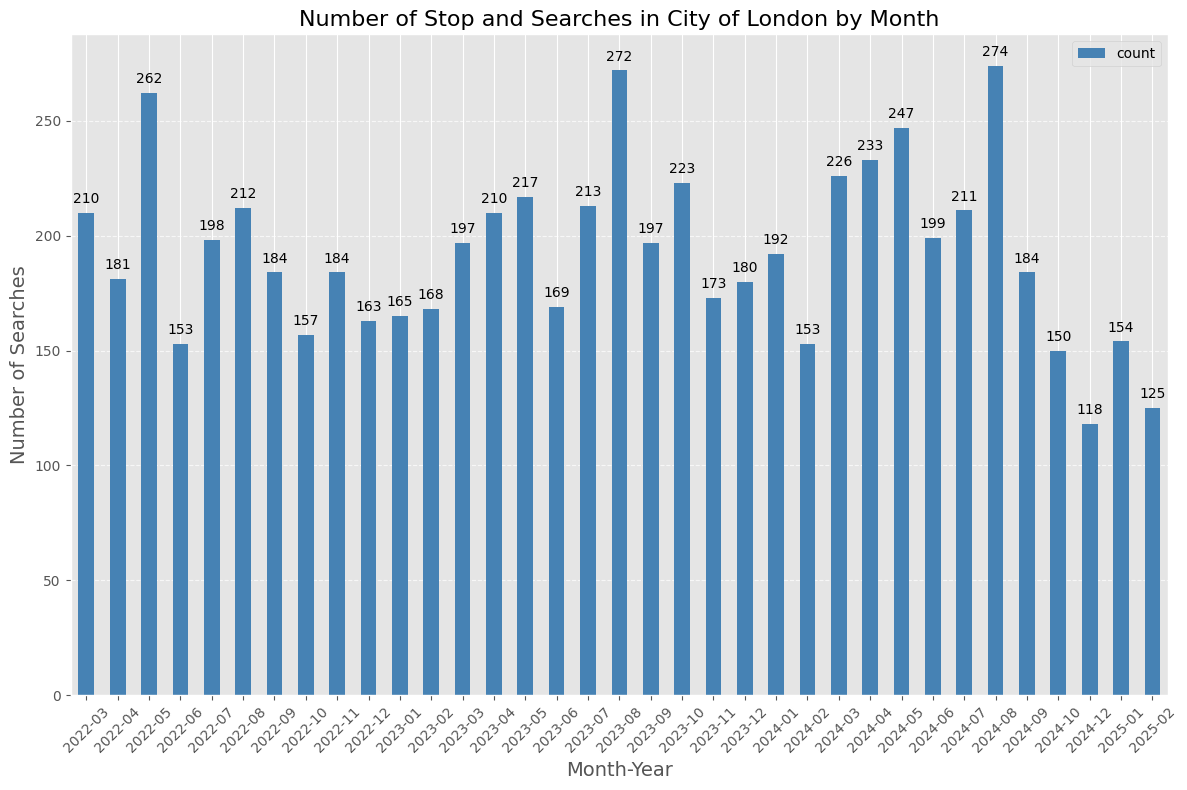


===== BASIC STATISTICS =====
Total number of stop and searches: 6754

Missing data per column:


,Missing Values,Percentage
Policing operation,6754,100.00
Part of a policing operation,6754,100.00
Longitude,1662,24.61
Latitude,1662,24.61
Age range,634,9.39
Self-defined ethnicity,324,4.80
Officer-defined ethnicity,324,4.80
Legislation,100,1.48
Object of search,20,0.30



===== OUTCOME ANALYSIS =====


,Count,Percentage
Outcome,,
A no further action disposal,5092,75.39
Arrest,1145,16.95
Khat or Cannabis warning,337,4.99
Community resolution,75,1.11
Penalty Notice for Disorder,55,0.81
Summons / charged by post,43,0.64
Caution (simple or conditional),7,0.10


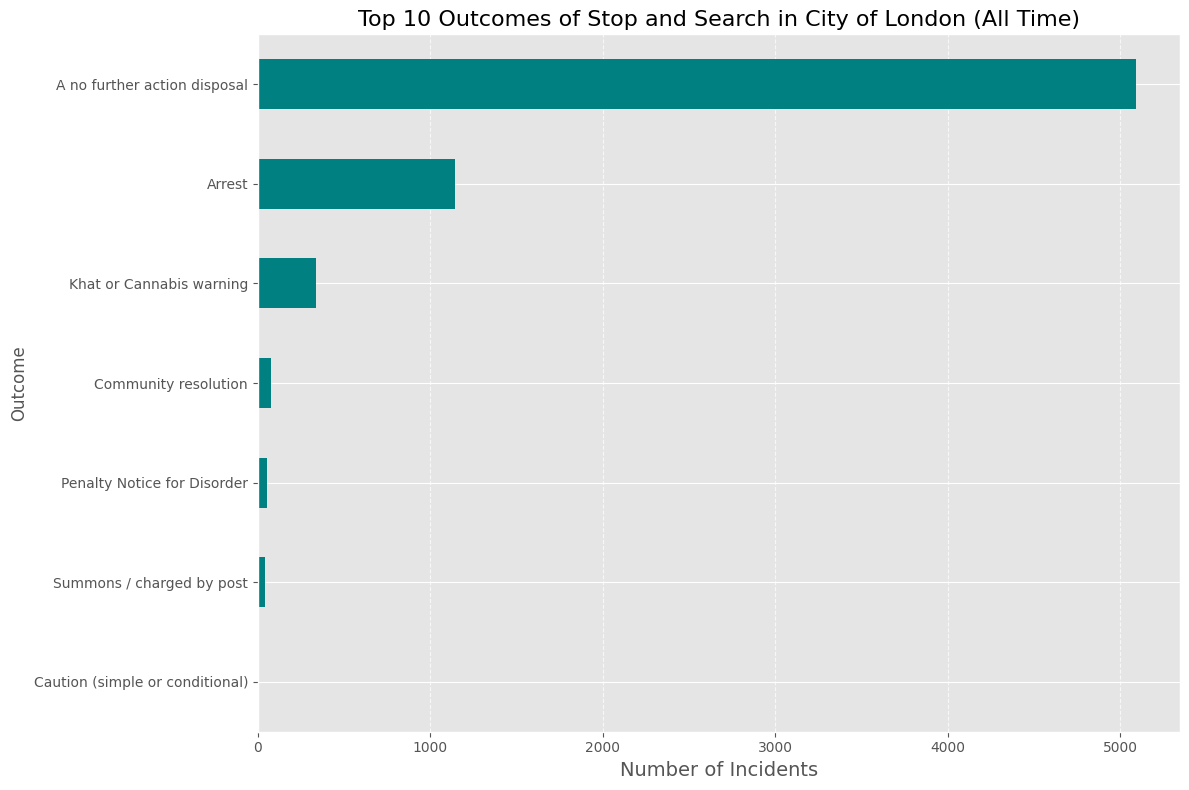


Overall success rate: 19.62%
Successful searches: 1325 out of 6754

===== OBJECTS OF SEARCH =====


,Count,Percentage
Object of search,,
Controlled drugs,3329,49.29
Stolen goods,1259,18.64
Article for use in theft,1118,16.55
Offensive weapons,654,9.68
Evidence of offences under the Act,163,2.41
Firearms,101,1.50
Articles for use in criminal damage,73,1.08
Psychoactive substances,30,0.44
Fireworks,4,0.06


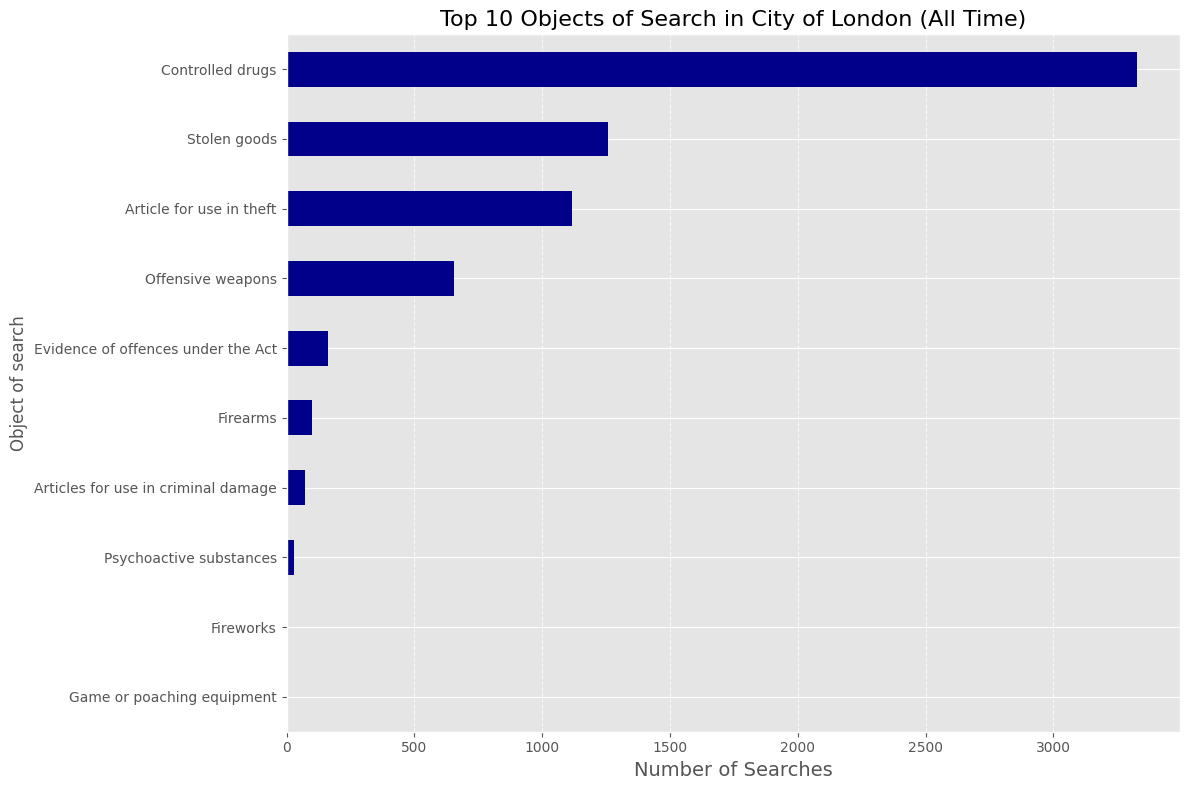


===== SUCCESS RATE BY OBJECT OF SEARCH =====


,Total Searches,Success Rate
Object of search,,
Controlled drugs,3329,20.43
Stolen goods,1259,25.02
Article for use in theft,1118,20.04
Offensive weapons,654,6.27
Evidence of offences under the Act,163,16.56
Firearms,101,7.92
Articles for use in criminal damage,73,26.03
Psychoactive substances,30,30.00
Fireworks,4,0.00


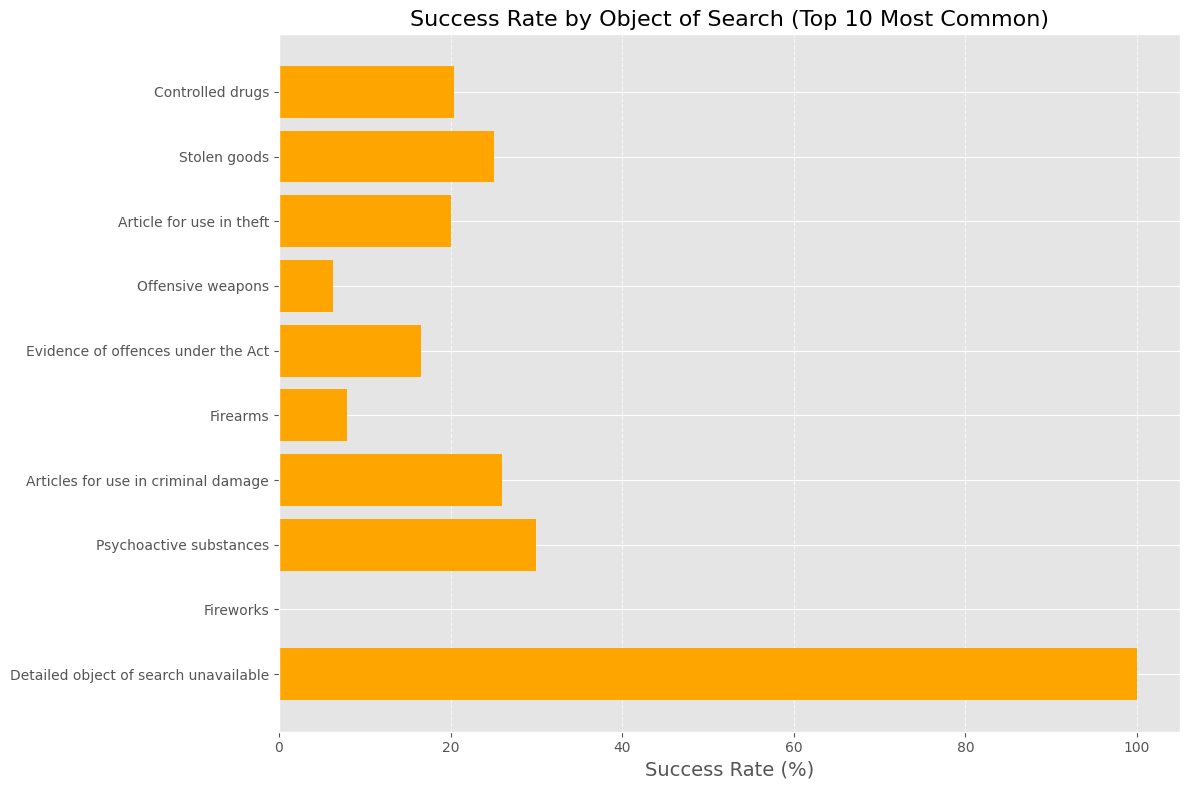


===== TIME-BASED ANALYSIS =====

Stop and Searches by Year:


Year
2022    1904
2023    2384
2024    2187
2025     279
Name: count, dtype: int64


Stop and Searches by Hour of Day:


Hour
0    258
1    308
2    303
3    322
4    336
Name: count, dtype: int64

C:\Users\x1 yoga\AppData\Local\Temp\ipykernel_11288\2179183691.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=all_stop_search_df, palette='viridis')


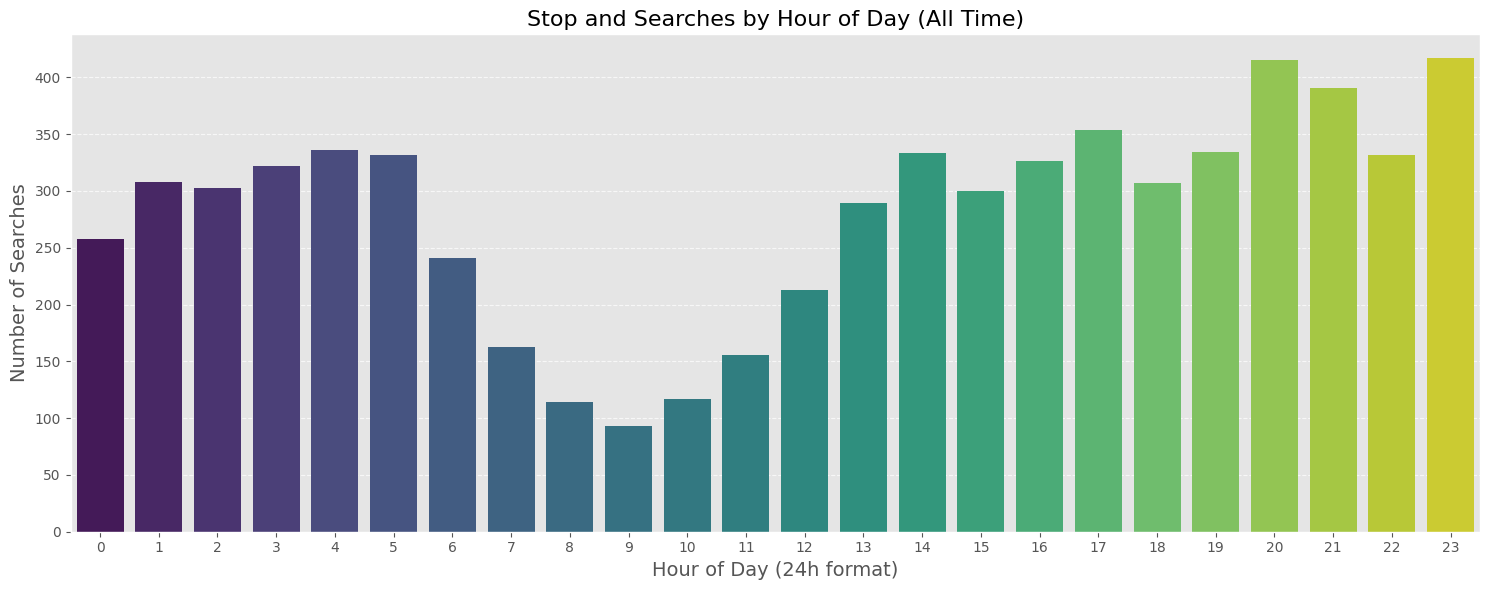


Stop and Searches by Day of Week:


Weekday
Monday        741
Tuesday       837
Wednesday     991
Thursday     1174
Friday       1216
Saturday     1007
Sunday        788
Name: count, dtype: int64

C:\Users\x1 yoga\AppData\Local\Temp\ipykernel_11288\2179183691.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=all_stop_search_df, order=weekday_order, palette='muted')


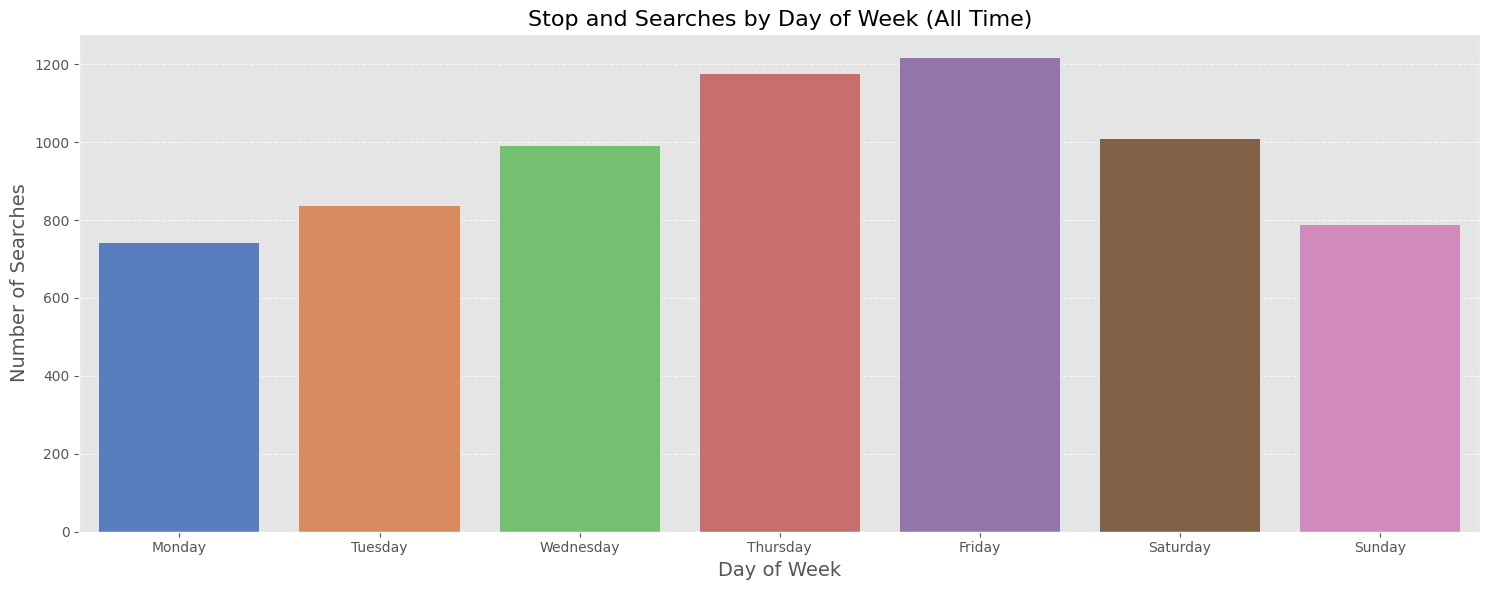

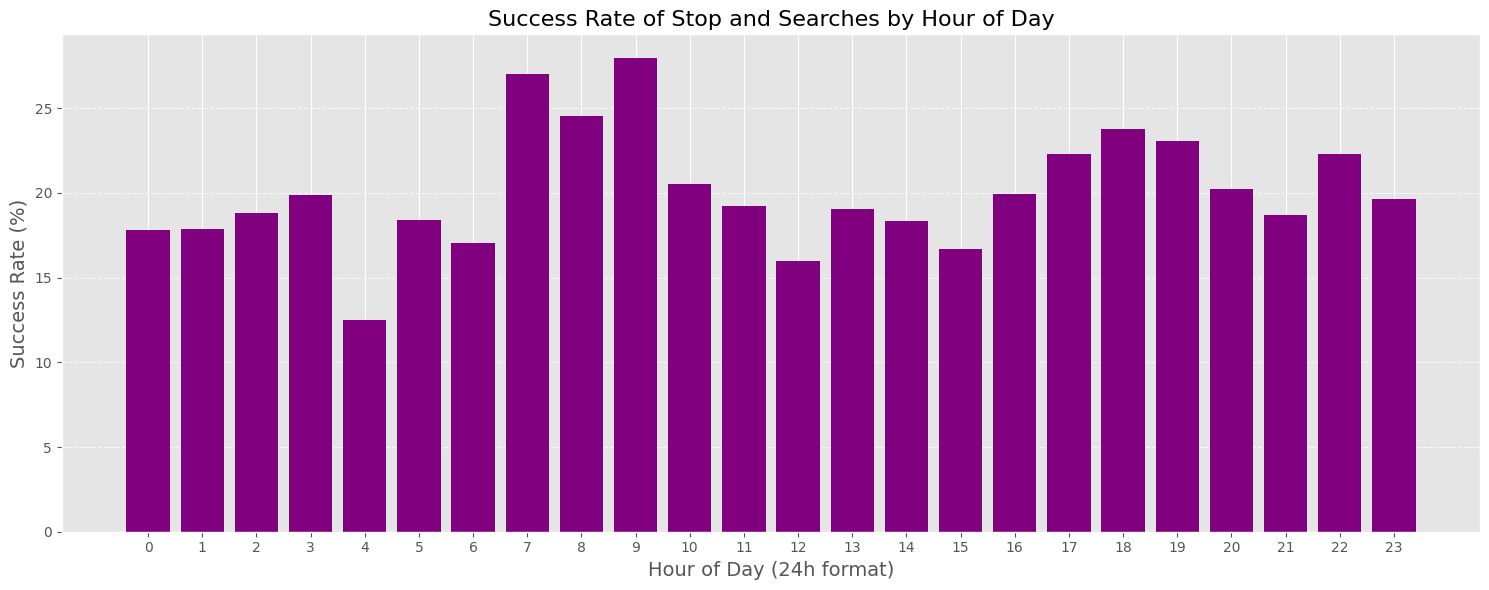

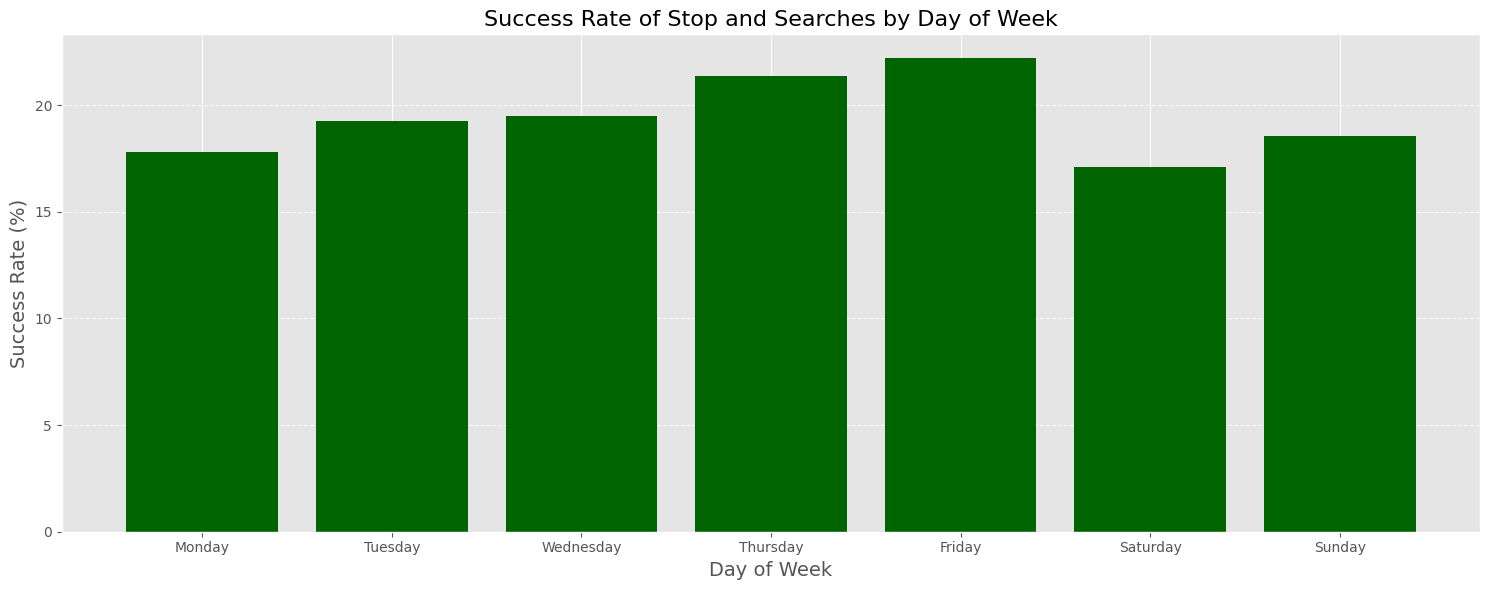


===== LEGISLATION ANALYSIS =====


,Count,Percentage
Legislation,,
Misuse of Drugs Act 1971 (section 23),3305,48.93
Police and Criminal Evidence Act 1984 (section 1),3173,46.98
Firearms Act 1968 (section 47),96,1.42
Criminal Justice and Public Order Act 1994 (section 60),61,0.90
Psychoactive Substances Act 2016 (s36(2)),17,0.25
Criminal Justice Act 1988 (section 139B),2,0.03


,count,mean
Legislation,,
Misuse of Drugs Act 1971 (section 23),3305,20.484115
Police and Criminal Evidence Act 1984 (section 1),3173,19.287740
Firearms Act 1968 (section 47),96,10.416667
Criminal Justice and Public Order Act 1994 (section 60),61,4.918033
Psychoactive Substances Act 2016 (s36(2)),17,23.529412
Criminal Justice Act 1988 (section 139B),2,0.000000



===== GEOGRAPHIC ANALYSIS =====
Records with geographic coordinates: 5092 (75.39%)

Creating maps of stop and search locations...


C:\Users\x1 yoga\AppData\Local\Temp\ipykernel_11288\2179183691.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_df['Latitude'] = pd.to_numeric(geo_df['Latitude'], errors='coerce')
C:\Users\x1 yoga\AppData\Local\Temp\ipykernel_11288\2179183691.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_df['Longitude'] = pd.to_numeric(geo_df['Longitude'], errors='coerce')


AttributeError: 'float' object has no attribute 'split'

In [31]:
# Display records per month
file_counts_df = pd.DataFrame.from_dict(file_counts, orient='index', columns=['count'])
file_counts_df.index.name = 'month_year'
file_counts_df = file_counts_df.sort_index()

# Plot the number of stop and searches per month
plt.figure(figsize=(15, 6))
ax = file_counts_df.plot(kind='bar', color='steelblue')
plt.title('Number of Stop and Searches in City of London by Month', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Number of Searches', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate with numbers for readability
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Basic info about the dataset
print("\n===== BASIC STATISTICS =====")
print(f"Total number of stop and searches: {len(all_stop_search_df)}")

# Check for missing data
print("\nMissing data per column:")
missing_data = all_stop_search_df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_data / len(all_stop_search_df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_pct})
display(missing_df[missing_df['Missing Values'] > 0])

# Analyze the outcomes
print("\n===== OUTCOME ANALYSIS =====")
outcome_counts = all_stop_search_df['Outcome'].value_counts()
outcome_pct = (outcome_counts / len(all_stop_search_df) * 100).round(2)
outcome_df = pd.DataFrame({'Count': outcome_counts, 'Percentage': outcome_pct})
display(outcome_df.head(10))

# Plot the outcomes
plt.figure(figsize=(12, 8))
outcome_counts.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Outcomes of Stop and Search in City of London (All Time)', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=14)
plt.gca().invert_yaxis()  # To have the highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Define what constitutes a "successful" search (where something was found)
# Common indications of items found: arrests, cautions, community resolutions, drugs found
success_terms = ['Arrest', 'Caution', 'Community resolution', 'Drugs', 'Stolen goods', 'Summons', 'Penalty']

# Create a function to determine if a search was successful
def was_successful(outcome):
    if pd.isna(outcome):
        return False
    return any(term.lower() in outcome.lower() for term in success_terms)

# Apply the function to create a new column
all_stop_search_df['successful'] = all_stop_search_df['Outcome'].apply(was_successful)

# Calculate success rate
success_rate = all_stop_search_df['successful'].mean() * 100
print(f"\nOverall success rate: {success_rate:.2f}%")
print(f"Successful searches: {all_stop_search_df['successful'].sum()} out of {len(all_stop_search_df)}")

# Analyze objects of search
print("\n===== OBJECTS OF SEARCH =====")
object_counts = all_stop_search_df['Object of search'].value_counts()
object_pct = (object_counts / len(all_stop_search_df) * 100).round(2)
object_df = pd.DataFrame({'Count': object_counts, 'Percentage': object_pct})
display(object_df.head(10))

# Plot objects of search
plt.figure(figsize=(12, 8))
object_counts.head(10).plot(kind='barh', color='darkblue')
plt.title('Top 10 Objects of Search in City of London (All Time)', fontsize=16)
plt.xlabel('Number of Searches', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Success rate by object of search
print("\n===== SUCCESS RATE BY OBJECT OF SEARCH =====")
success_by_object = all_stop_search_df.groupby('Object of search')['successful'].agg(['count', 'mean'])
success_by_object = success_by_object.rename(columns={'count': 'Total Searches', 'mean': 'Success Rate'})
success_by_object['Success Rate'] = (success_by_object['Success Rate'] * 100).round(2)
success_by_object = success_by_object.sort_values('Total Searches', ascending=False)
display(success_by_object.head(10))

# Plot success rate by object of search (for top 10 most common objects)
plt.figure(figsize=(12, 8))
top_objects = success_by_object.head(10).index
success_rates = success_by_object.loc[top_objects, 'Success Rate']
plt.barh(top_objects, success_rates, color='orange')
plt.title('Success Rate by Object of Search (Top 10 Most Common)', fontsize=16)
plt.xlabel('Success Rate (%)', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Time-based analysis
print("\n===== TIME-BASED ANALYSIS =====")

# CFOUND IT! THE DATE TIME OBJECT TO THE RESCUE
all_stop_search_df['DateTime'] = pd.to_datetime(all_stop_search_df['Date'], errors='coerce')

# Extract time components
all_stop_search_df['Year'] = all_stop_search_df['DateTime'].dt.year
all_stop_search_df['Month'] = all_stop_search_df['DateTime'].dt.month
all_stop_search_df['Day'] = all_stop_search_df['DateTime'].dt.day
all_stop_search_df['Hour'] = all_stop_search_df['DateTime'].dt.hour
all_stop_search_df['Weekday'] = all_stop_search_df['DateTime'].dt.day_name()

# Analysis by year
print("\nStop and Searches by Year:")
year_counts = all_stop_search_df['Year'].value_counts().sort_index()
display(year_counts)

# Analysis by hour of day
print("\nStop and Searches by Hour of Day:")
hour_counts = all_stop_search_df['Hour'].value_counts().sort_index()
display(hour_counts.head())

# Plot by hour of day
plt.figure(figsize=(15, 6))
sns.countplot(x='Hour', data=all_stop_search_df, palette='viridis')
plt.title('Stop and Searches by Hour of Day (All Time)', fontsize=16)
plt.xlabel('Hour of Day (24h format)', fontsize=14)
plt.ylabel('Number of Searches', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analysis by day of week
print("\nStop and Searches by Day of Week:")
# Ensure proper ordering of days
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = all_stop_search_df['Weekday'].value_counts().reindex(weekday_order)
display(weekday_counts)

# Plot by day of week
plt.figure(figsize=(15, 6))
sns.countplot(x='Weekday', data=all_stop_search_df, order=weekday_order, palette='muted')
plt.title('Stop and Searches by Day of Week (All Time)', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Searches', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Success rate by hour of day
success_by_hour = all_stop_search_df.groupby('Hour')['successful'].agg(['count', 'mean'])
success_by_hour['mean'] = success_by_hour['mean'] * 100
success_by_hour = success_by_hour.sort_index()

# Plot success rate by hour
plt.figure(figsize=(15, 6))
plt.bar(success_by_hour.index, success_by_hour['mean'], color='purple')
plt.title('Success Rate of Stop and Searches by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (24h format)', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Success rate by day of week
success_by_weekday = all_stop_search_df.groupby('Weekday')['successful'].agg(['count', 'mean'])
success_by_weekday['mean'] = success_by_weekday['mean'] * 100
success_by_weekday = success_by_weekday.reindex(weekday_order)

# Plot success rate by day of week
plt.figure(figsize=(15, 6))
plt.bar(success_by_weekday.index, success_by_weekday['mean'], color='darkgreen')
plt.title('Success Rate of Stop and Searches by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Legislation analysis
print("\n===== LEGISLATION ANALYSIS =====")
legislation_counts = all_stop_search_df['Legislation'].value_counts()
legislation_pct = (legislation_counts / len(all_stop_search_df) * 100).round(2)
legislation_df = pd.DataFrame({'Count': legislation_counts, 'Percentage': legislation_pct})
display(legislation_df.head(10))

# Success rate by legislation
success_by_legislation = all_stop_search_df.groupby('Legislation')['successful'].agg(['count', 'mean'])
success_by_legislation['mean'] = success_by_legislation['mean'] * 100
success_by_legislation = success_by_legislation.sort_values('count', ascending=False)
display(success_by_legislation.head(10))

# Geographic analysis
print("\n===== GEOGRAPHIC ANALYSIS =====")
# Check if we have geographic data
has_coords = (~all_stop_search_df['Latitude'].isna() & ~all_stop_search_df['Longitude'].isna()).sum()
print(f"Records with geographic coordinates: {has_coords} ({has_coords/len(all_stop_search_df)*100:.2f}%)")

if has_coords > 0:
    # Filter to records with valid coordinates
    geo_df = all_stop_search_df.dropna(subset=['Latitude', 'Longitude'])
    
    # Ensure coordinates are numeric
    geo_df['Latitude'] = pd.to_numeric(geo_df['Latitude'], errors='coerce')
    geo_df['Longitude'] = pd.to_numeric(geo_df['Longitude'], errors='coerce')
    
    # Filter out any invalid coordinates after conversion
    geo_df = geo_df.dropna(subset=['Latitude', 'Longitude'])
    
    # Create a map showing all stop and searches
    print("\nCreating maps of stop and search locations...")
    search_map = folium.Map(location=[51.5141, -0.0900], zoom_start=14, tiles='CartoDB positron')
    
    # Create heatmap of all searches
    heat_data = [[row['Latitude'], row['Longitude']] for _, row in geo_df.iterrows()]
    HeatMap(heat_data, radius=15, gradient={0.4: 'blue', 0.6: 'cyan', 0.8: 'lime', 1.0: 'yellow'}).add_to(search_map)
    
    # Create heatmap of successful searches 
    successful_geo_df = geo_df[geo_df['successful'] == True]
    if len(successful_geo_df) > 0:
        success_heat_data = [[row['Latitude'], row['Longitude']] for _, row in successful_geo_df.iterrows()]
        success_map = folium.Map(location=[51.5141, -0.0900], zoom_start=14, tiles='CartoDB positron')
        HeatMap(success_heat_data, radius=15, gradient={0.4: 'purple', 0.6: 'red', 0.8: 'orange', 1.0: 'yellow'}).add_to(success_map)
        
        # Save the success map
        success_map.save('city_london_successful_searches_map.html')
        print("Map of successful searches saved as 'city_london_successful_searches_map.html'")
    
    # Save the map of all searches
    search_map.save('city_london_all_searches_map.html')
    print("Map of all searches saved as 'city_london_all_searches_map.html'")
    
    # Display the map in the notebook
    display(search_map)

# Correlate with burglary data if available
print("\n===== CORRELATION WITH BURGLARY DATA =====")
# Find street crime files for City of London
street_files = glob.glob('data/2025-02/**/????-??-city-of-london-street.csv', recursive=True)
print(f"Found {len(street_files)} street crime files for City of London")

if len(street_files) > 0:
    # Load all street crime data
    all_street_df = pd.DataFrame()
    
    for file in street_files[:12]:  # Limit to 12 months to avoid memory issues
        try:
            basename = os.path.basename(file)
            month_year = basename.split('-city-of-london')[0]
            df = pd.read_csv(file)
            df['file_date'] = month_year
            all_street_df = pd.concat([all_street_df, df], ignore_index=True)
        except Exception as e:
            print(f"Error loading {file}: {e}")
    
    print(f"Loaded {len(all_street_df)} street crime records")
    
    # Filter for burglaries
    burglaries = all_street_df[all_street_df['Crime type'] == 'Burglary']
    print(f"Number of burglaries in the street crime data: {len(burglaries)}")
    
    # Check if we have coordinates for burglaries
    burg_coords = (~burglaries['Latitude'].isna() & ~burglaries['Longitude'].isna()).sum()
    print(f"Burglaries with coordinates: {burg_coords}")
    
    if burg_coords > 0 and has_coords > 0:
        # Create a map with both burglaries and stop-searches
        combined_map = folium.Map(location=[51.5141, -0.0900], zoom_start=14, tiles='CartoDB positron')
        
        # Add a heatmap layer for stop and searches
        folium.TileLayer('CartoDB dark_matter', name='Dark Map').add_to(combined_map)
        
        # Stop and search heatmap
        search_heat = HeatMap(heat_data, radius=15, gradient={0.4: 'blue', 0.6: 'cyan', 0.8: 'lime', 1.0: 'yellow'}, 
                              name='Stop & Search Heatmap')
        search_heat.add_to(combined_map)
        
        # Burglary heatmap
        burglary_geo_df = burglaries.dropna(subset=['Latitude', 'Longitude'])
        heat_data_burg = [[row['Latitude'], row['Longitude']] for _, row in burglary_geo_df.iterrows()]
        burglary_heat = HeatMap(heat_data_burg, radius=15, gradient={0.4: 'purple', 0.6: 'magenta', 0.8: 'red', 1.0: 'orange'}, 
                               name='Burglary Heatmap')
        burglary_heat.add_to(combined_map)
        
        # Add layer control
        folium.LayerControl().add_to(combined_map)
        
        # Save the map
        combined_map.save('city_london_search_burglary_combined_map.html')
        print("Combined heatmap of searches and burglaries saved as 'city_london_search_burglary_combined_map.html'")
        
        # Display the map
        display(combined_map)
        
        # Temporal analysis to see if there's correlation between stop-searches and burglaries
        if 'Month' in burglaries.columns:
            print("\nBurglaries by month:")
            burglary_by_month = burglaries['Month'].value_counts().sort_index()
            display(burglary_by_month)
            
            # Plot by month to see if there's any pattern
            plt.figure(figsize=(15, 6))
            plt.plot(file_counts_df.index, file_counts_df['count'], 'b-o', label='Stop & Searches')
            
            # We'd need to align the time periods to properly compare
            print("\nNote: A proper temporal correlation would require aligning the time periods")

## The following involves applying basic k means with the number of police officers as clusters in problematic areas identified previously

In [34]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl (40.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Number of successful police actions with valid coordinates: 36
Number of unsuccessful police actions with valid coordinates: 129
Number of unique successful locations: 23
Setting number of officers to 23 based on unique locations
Number of improved outcomes due to officer deployment: 31
Number of remaining unsuccessful outcomes: 98

Success Rate Analysis:
Original success rate: 21.82%
Estimated success rate after deployment: 40.61%
Improvement: 18.79 percentage points


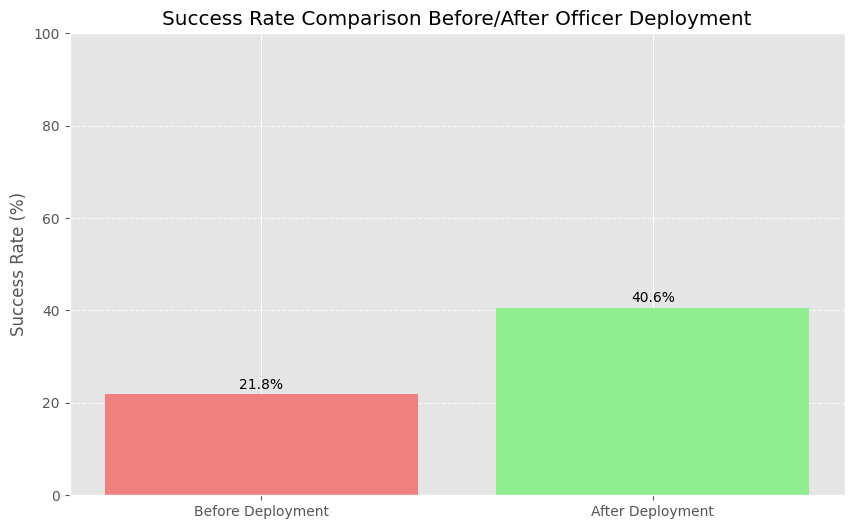

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
from folium.plugins import HeatMap, MarkerCluster
import random
from folium.plugins import DualMap

# Load outcomes data where we can see successful operations
outcomes_df = pd.read_csv('data/2025-02/2022-03/2022-03-city-of-london-outcomes.csv')

# Extract successful outcomes (charges, cautions, penalties, etc.)
successful_outcomes = [
    'Suspect charged',
    'Offender given a caution',
    'Offender given penalty notice',
    'Offender given a drugs possession warning'
]

# Filter locations where police actions were successful
successful_df = outcomes_df[outcomes_df['Outcome type'].isin(successful_outcomes)].copy()

# Get unsuccessful outcomes for comparison
unsuccessful_outcomes = [
    'Investigation complete; no suspect identified',
    'Unable to prosecute suspect',
    'Formal action is not in the public interest'
]
unsuccessful_df = outcomes_df[outcomes_df['Outcome type'].isin(unsuccessful_outcomes)].copy()

# Remove rows with missing coordinates from both dataframes
successful_df = successful_df.dropna(subset=['Longitude', 'Latitude'])
unsuccessful_df = unsuccessful_df.dropna(subset=['Longitude', 'Latitude'])

print(f"Number of successful police actions with valid coordinates: {len(successful_df)}")
print(f"Number of unsuccessful police actions with valid coordinates: {len(unsuccessful_df)}")

# Extract coordinates of successful operations
coords = successful_df[['Longitude', 'Latitude']].values

# Find unique coordinates to determine max number of clusters
unique_coords = np.unique(coords, axis=0)
num_unique = len(unique_coords)
print(f"Number of unique successful locations: {num_unique}")

# Set officer count to number of unique locations
num_officers = num_unique
print(f"Setting number of officers to {num_officers} based on unique locations")

# Apply K-means clustering to determine optimal officer locations
if len(coords) > 0:
    kmeans = KMeans(n_clusters=num_officers, random_state=42)
    kmeans.fit(coords)
    officer_locations = kmeans.cluster_centers_
    
    # Count number of incidents per cluster to assign importance
    labels = kmeans.labels_
    incident_counts = np.bincount(labels)
    
    # Create a dual map side by side for comparison
    dual_map = DualMap(location=[51.5155, -0.0922], zoom_start=15)
    
    # Left map: Before deployment (current situation)
    left_map = dual_map.m1
    left_map.save('before_deployment.html')
    
    # Add successful operations as green markers
    successful_cluster = MarkerCluster(name="Successful Operations").add_to(left_map)
    for _, row in successful_df.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=8,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.7,
            popup=f"Success: {row['Outcome type']}"
        ).add_to(successful_cluster)
    
    # Add unsuccessful operations as red markers
    unsuccessful_cluster = MarkerCluster(name="Unsuccessful Operations").add_to(left_map)
    for _, row in unsuccessful_df.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            popup=f"Unsuccessful: {row['Outcome type']}"
        ).add_to(unsuccessful_cluster)
    
    # Add a heatmap of all crime incidents
    all_incidents = pd.concat([successful_df, unsuccessful_df])
    heat_data = [[row['Latitude'], row['Longitude']] for _, row in all_incidents.iterrows()]
    HeatMap(heat_data, name="Crime Heatmap").add_to(left_map)
    
    # Add title to the left map
    title_html = '''
             <h3 align="center" style="font-size:16px"><b>Before Officer Deployment</b></h3>
             '''
    left_map.get_root().html.add_child(folium.Element(title_html))
    
    # Right map: After deployment (optimized officer placement)
    right_map = dual_map.m2
    
    # Add successful operations as green markers
    successful_cluster_right = MarkerCluster(name="Successful Operations").add_to(right_map)
    for _, row in successful_df.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=8,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.7,
            popup=f"Success: {row['Outcome type']}"
        ).add_to(successful_cluster_right)
    
    # Function to determine if a point is within range of any officer
    def is_within_range(lat, lon, officer_locations, range_deg=0.001):
        """Check if a point is within range of any officer"""
        point = np.array([lon, lat])
        for officer in officer_locations:
            dist = np.sqrt(np.sum((point - officer)**2))
            if dist <= range_deg:
                return True
        return False
    
    # Simulate improved outcomes - convert some unsuccessful to successful when near officers
    improved_successes = []
    remaining_unsuccessful = []
    
    for _, row in unsuccessful_df.iterrows():
        if is_within_range(row['Latitude'], row['Longitude'], officer_locations):
            # Simulate a 70% chance of becoming successful with officer nearby
            if random.random() < 0.7:
                improved_successes.append(row)
                continue
        remaining_unsuccessful.append(row)
    
    improved_successes_df = pd.DataFrame(improved_successes)
    remaining_unsuccessful_df = pd.DataFrame(remaining_unsuccessful)
    
    print(f"Number of improved outcomes due to officer deployment: {len(improved_successes)}")
    print(f"Number of remaining unsuccessful outcomes: {len(remaining_unsuccessful)}")
    
    # Add improved successes (previously unsuccessful) as blue markers
    if not improved_successes_df.empty:
        improved_cluster = MarkerCluster(name="Improved Outcomes").add_to(right_map)
        for _, row in improved_successes_df.iterrows():
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=8,
                color='blue',
                fill=True,
                fill_color='blue',
                fill_opacity=0.7,
                popup=f"Improved: {row['Outcome type']} → Success"
            ).add_to(improved_cluster)
    
    # Add remaining unsuccessful as red markers
    if not remaining_unsuccessful_df.empty:
        remaining_unsuccessful_cluster = MarkerCluster(name="Remaining Unsuccessful").add_to(right_map)
        for _, row in remaining_unsuccessful_df.iterrows():
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=5,
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=0.7,
                popup=f"Still Unsuccessful: {row['Outcome type']}"
            ).add_to(remaining_unsuccessful_cluster)
    
    # Add officer locations with coverage radius
    officer_cluster = MarkerCluster(name="Officer Locations").add_to(right_map)
    for i, location in enumerate(officer_locations):
        # Use incident count to determine marker size (scaled)
        marker_size = min(20, max(5, (incident_counts[i % len(incident_counts)] / max(incident_counts)) * 20))
        
        # Add officer marker
        folium.CircleMarker(
            location=[location[1], location[0]],
            radius=marker_size,
            color='darkblue',
            fill=True,
            fill_color='darkblue',
            fill_opacity=0.7,
            popup=f"Officer {i+1}"
        ).add_to(officer_cluster)
        
        # Add coverage radius (100m)
        folium.Circle(
            location=[location[1], location[0]],
            radius=100,  # 100 meters
            color='darkblue',
            fill=False,
            weight=1,
            popup=f"Officer {i+1} coverage"
        ).add_to(right_map)
    
    # Add a modified heatmap reflecting the improved situation
    all_incidents_after = pd.concat([successful_df, improved_successes_df, remaining_unsuccessful_df])
    heat_data_after = [[row['Latitude'], row['Longitude']] for _, row in all_incidents_after.iterrows()]
    HeatMap(heat_data_after, name="Crime Heatmap After").add_to(right_map)
    
    # Add title to the right map
    title_html_right = '''
             <h3 align="center" style="font-size:16px"><b>After Officer Deployment</b></h3>
             '''
    right_map.get_root().html.add_child(folium.Element(title_html_right))
    
    # Add layer controls to both maps
    folium.LayerControl().add_to(left_map)
    folium.LayerControl().add_to(right_map)
    
    # Display the dual map
    dual_map.save('before_after_deployment.html')
    dual_map
    
    # Calculate success rate improvement
    original_success_rate = len(successful_df) / (len(successful_df) + len(unsuccessful_df)) * 100
    new_success_rate = (len(successful_df) + len(improved_successes)) / (len(successful_df) + len(unsuccessful_df)) * 100
    
    print(f"\nSuccess Rate Analysis:")
    print(f"Original success rate: {original_success_rate:.2f}%")
    print(f"Estimated success rate after deployment: {new_success_rate:.2f}%")
    print(f"Improvement: {new_success_rate - original_success_rate:.2f} percentage points")
    
    # Plot success rate comparison
    plt.figure(figsize=(10, 6))
    bars = plt.bar(['Before Deployment', 'After Deployment'], 
                  [original_success_rate, new_success_rate], 
                  color=['lightcoral', 'lightgreen'])
    
    # Add percentage labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom')
    
    plt.title('Success Rate Comparison Before/After Officer Deployment')
    plt.ylabel('Success Rate (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
else:
    print("No valid data points for officer allocation.")